# Predicting heart disease

# Table of contents
- [Data Analysis](#Data-Analysis)
- [Reading dataset](#Reading-dataset)
- [EDA 📉](#-EDA-📉)
- [Preprocessing](#Preprocessing)
    - [Feature Scaling - StandardScaler](#Feature-Scaling---StandardScaler)
- [Split into Training and Testing data](#Split-into-Training-and-Testing-data)
- [Model Formulation](#Model-Formulation)
- [Model Evaluation](#Model-Evaluation)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">1. | Introduction 👋</div>

## About the Data set
    This dataset gives the information realated to heart disease. Dataset contain 13 columns, target is the class variable which is affected by other 12 columns. Here the aim is to classify the target variable to (disease\non disease) using different machine learning algorithm and findout which algorithm suitable for this dataset.

    **Attribute Information**

    Age (age in years)
    Sex (1 = male; 0 = female)
    CP (chest pain type)
    TRESTBPS (resting blood pressure (in mm Hg on admission to the hospital))
    CHOL (serum cholestoral in mg/dl)
    FPS (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    RESTECH (resting electrocardiographic results)
    THALACH (maximum heart rate achieved)
    EXANG (exercise induced angina (1 = yes; 0 = no))
    OLDPEAK (ST depression induced by exercise relative to rest)
    SLOPE (the slope of the peak exercise ST segment)
    CA (number of major vessels (0-3) colored by flourosopy)
    THAL (3 = normal; 6 = fixed defect; 7 = reversable defect)
    TARGET (1 or 0)

# Data Analysis

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">2. | Importing Libraries 📚</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 <b>Importing libraries</b> that will be used in this notebook.
</div>


In [1]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import plotly.express as px
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline
import seaborn as sns
import warnings

#EDA
from collections import Counter
# import pandas_profiling as pp

# data preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression

# data splitting
from sklearn.model_selection import train_test_split


# data modeling
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import xgboost as xgb
from sklearn import tree

# settings
warnings.filterwarnings('ignore')


# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">3. | Color Palettes 🎨</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will create some <b>color palettes</b> that will be used in this notebook.
</div>

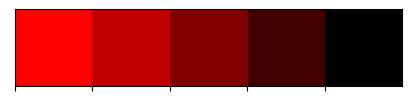

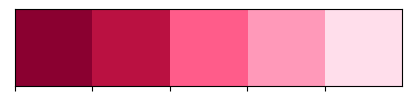

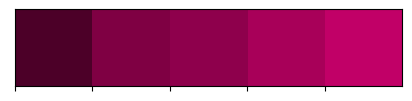

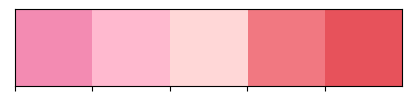

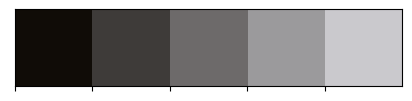

In [2]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

## Reading dataset

In [3]:
# --- Importing Dataset ---
df = pd.read_csv('heart1.csv')
data = df

# --- Reading Dataset ---
df.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

In [4]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', df.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', df.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
df.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 1025
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1025 non-null   int64  
 1   sex          1025 non-null   int64  
 2   chestpain    1025 non-null   int64  
 3   trestbps     1025 non-null   int64  
 4   cholesterol  1025 non-null   int64  
 5   fastbs       1025 non-null   int64  
 6   restecg      1025 non-null   int64  
 7   thalach      1025 non-null   int64  
 8   exang        1025 non-null   int64  
 9   oldpeak      1025 non-null   float64
 10  slope        1025 non-null   int64  
 11  ca           1025 non-null   int64  
 12  thal         1025 non-null   int64  
 13  target       1025 non-null   int64  
dtypes: float64(1), int64(13)

<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 It can be seen that dataset has successfully imported.<br>
    👉 In the dataset, there are <mark><b>14 columns</b></mark> with <mark><b>303 observations</b></mark>. Also, there are <mark><b>no null values</b></mark> in this dataset. The <b>details of each variables</b> also can be seen above.<br>
    👉 However, the <mark><b>data types for some columns are not matched</b></mark>. Below will <mark><b>fixed the data types for those column</b></mark> before analysis performed.

In [5]:
# --- Fix Data Types ---
lst=['sex', 'chestpain', 'fastbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
df[lst] = df[lst].astype(object)

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;">  Initial Data Exploration 🔍</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will focused on <b>initial data exploration</b> before applying ML models.

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  sex (Gender)</div>


*************************
.: Sex (Gender) Total :.
*************************


1    713
0    312
Name: sex, dtype: int64

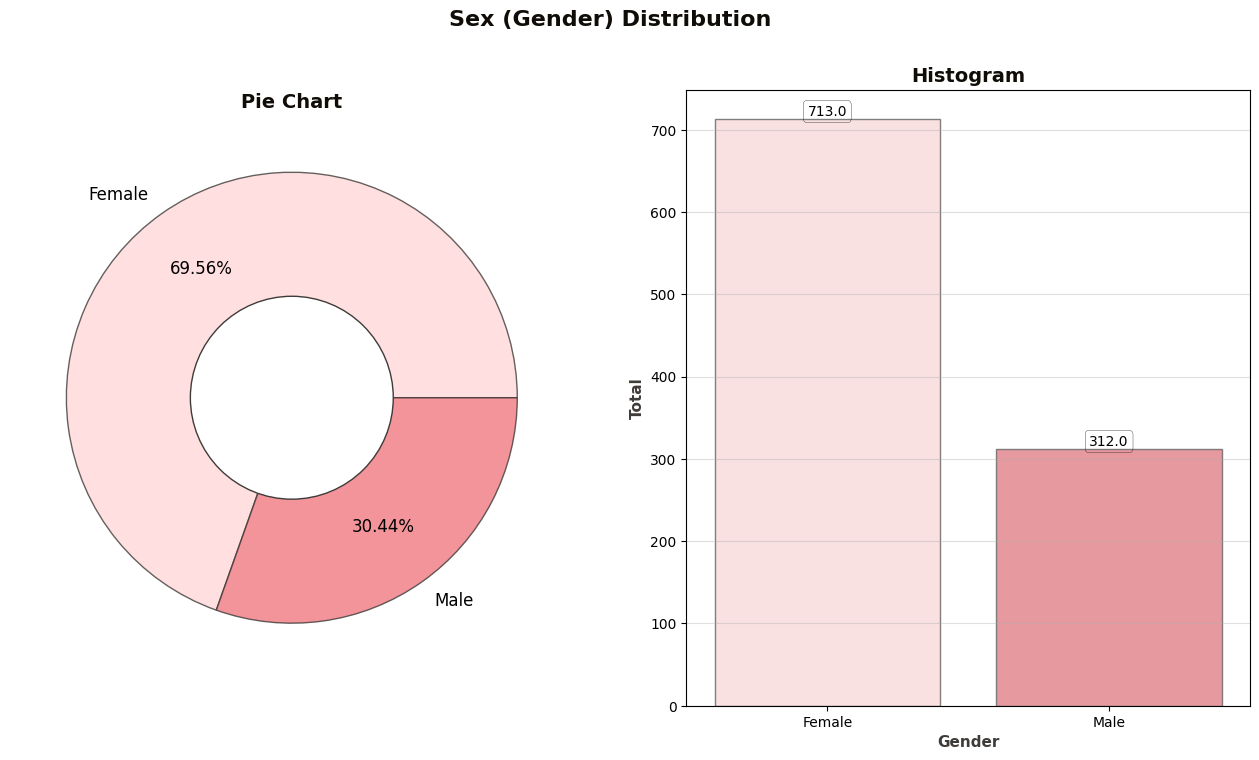

In [6]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[2:4]
labels=['Female', 'Male']
order=df['sex'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Sex (Gender) Distribution', fontweight='heavy', 
             fontsize='16', fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['sex'].value_counts(), labels=labels, colors=colors, pctdistance=0.7,
        autopct='%.2f%%', wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]),
        textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[0])
ax = sns.countplot(x='sex', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10, 
             bbox=dict(facecolor='none', edgecolor=black_grad[0], 
                       linewidth=0.25, boxstyle='round'))

plt.xlabel('Gender', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 25)
print('\033[1m'+'.: Sex (Gender) Total :.'+'\033[0m')
print('*' * 25)
df.sex.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  cp (Chest Pain Type)</div>

******************************
.: Chest Pain Type Total :.
******************************


0    497
2    284
1    167
3     77
Name: chestpain, dtype: int64

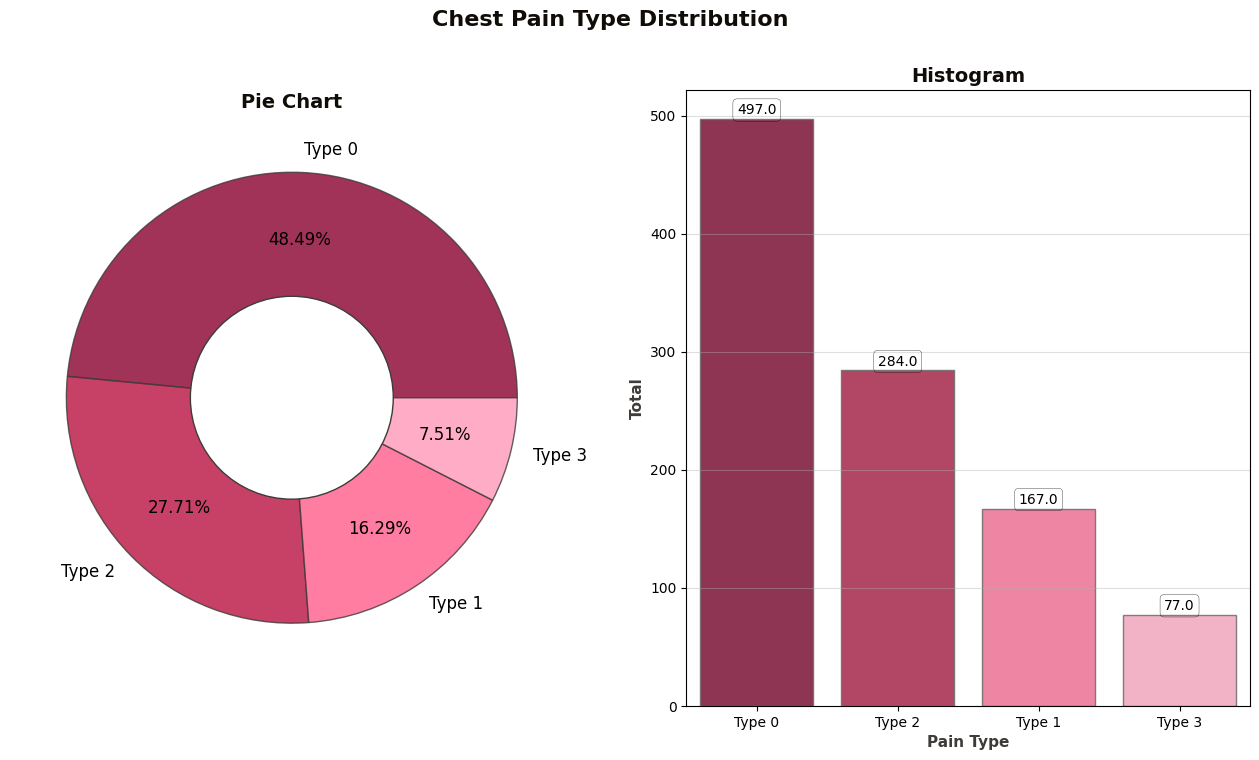

In [7]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[0:4]
labels=['Type 0', 'Type 2', 'Type 1', 'Type 3']
order=df['chestpain'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Chest Pain Type Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['chestpain'].value_counts(), labels=labels, colors=colors, pctdistance=0.7, 
        autopct='%.2f%%', textprops={'fontsize':12},
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]))
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='chestpain', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Pain Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1, 2, 3], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 30)
print('\033[1m'+'.: Chest Pain Type Total :.'+'\033[0m')
print('*' * 30)
df.chestpain.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> fbs (Fasting Blood Sugar)</div>

********************************
.: Fasting Blood Sugar Total :.
********************************


0    872
1    153
Name: fastbs, dtype: int64

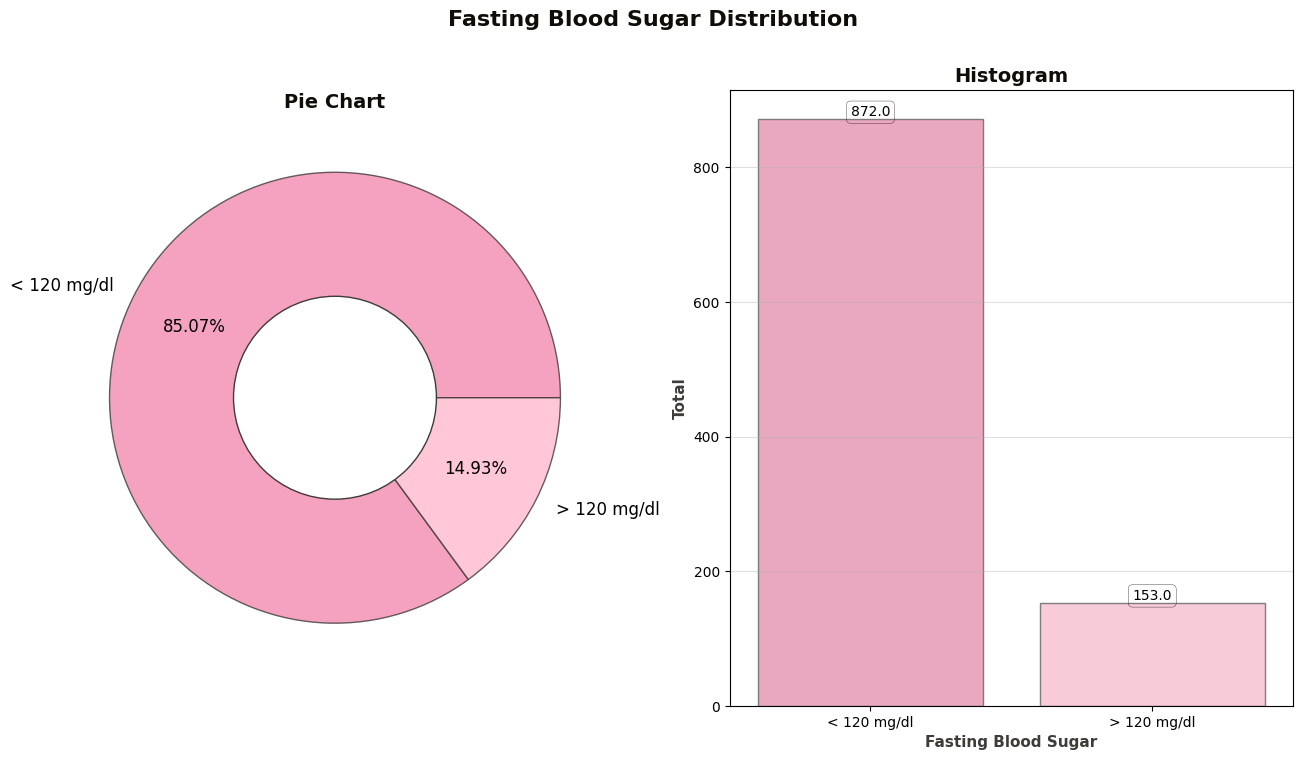

In [8]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[0:2]
labels=['< 120 mg/dl', '> 120 mg/dl']
order=df['fastbs'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Fasting Blood Sugar Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['fastbs'].value_counts(), labels=labels, colors=colors,
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='fastbs', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Fasting Blood Sugar', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt


# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 32)
print('\033[1m'+'.: Fasting Blood Sugar Total :.'+'\033[0m')
print('*' * 32)
df.fastbs.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  restecg (Resting Electrocardiographic Results)</div>

**************************************************
.: Resting Electrocardiographic Results Total :.
**************************************************


1    513
0    497
2     15
Name: restecg, dtype: int64

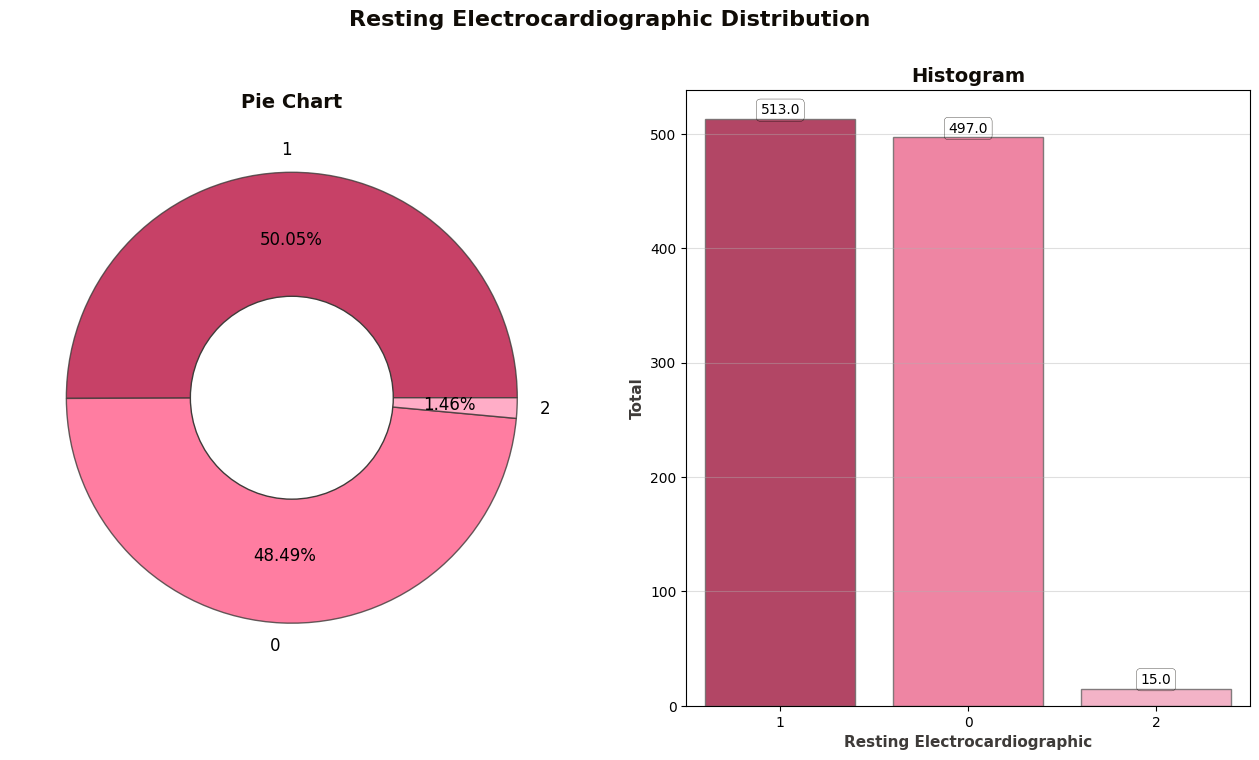

In [9]:
# --- Setting Colors, Labels, Order ---
colors=pink_grad[1:4]
labels=['1', '0', '2']
order=df['restecg'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Resting Electrocardiographic Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['restecg'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='restecg', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Resting Electrocardiographic', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 50)
print('\033[1m'+'.: Resting Electrocardiographic Results Total :.'+'\033[0m')
print('*' * 50)
df.restecg.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  exang (Exercise Induced Angina)</div>

***********************************
.: Exercise Induced Angina Total :.
***********************************


0    680
1    345
Name: exang, dtype: int64

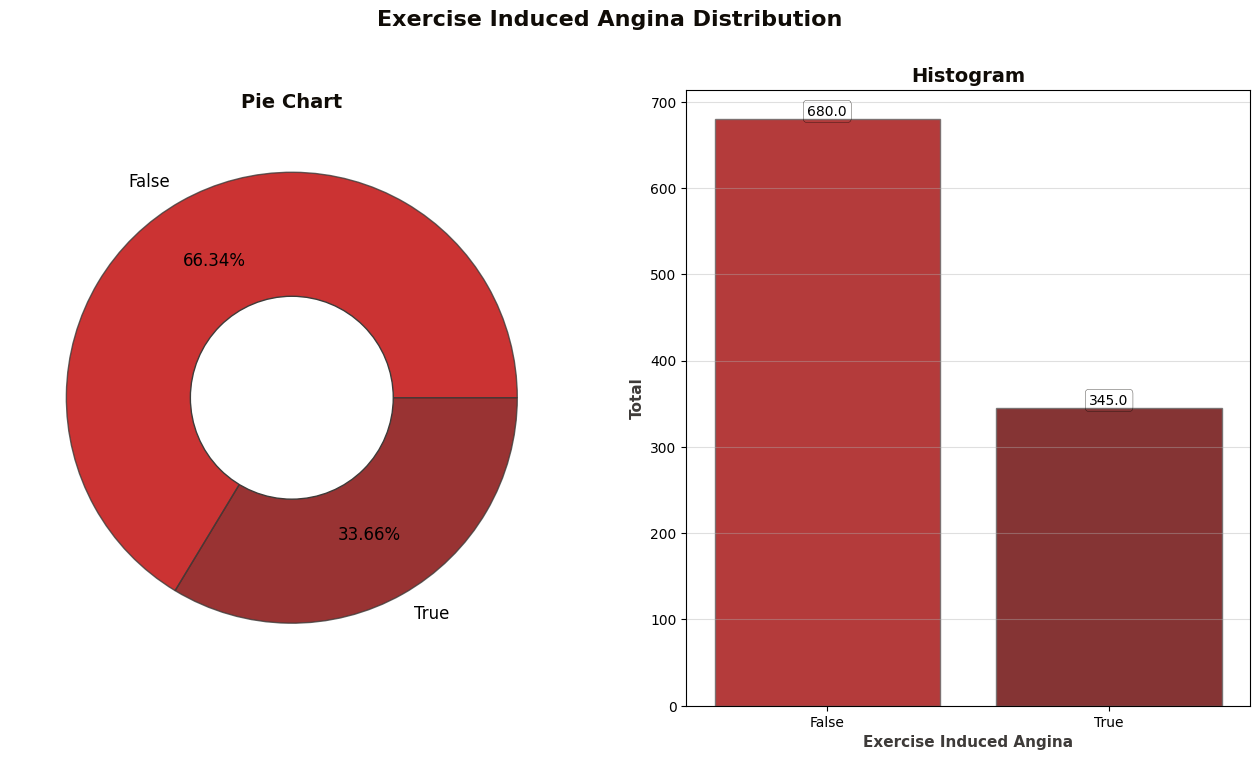

In [10]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[1:3]
labels=['False', 'True']
order=df['exang'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Exercise Induced Angina Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['exang'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='exang', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Exercise Induced Angina', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 35)
print('\033[1m'+'.: Exercise Induced Angina Total :.'+'\033[0m')
print('*' * 35)
df.exang.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  slope (Slope of the Peak Exercise)</div>

********************
.: Slope Total :.
********************


1    482
2    469
0     74
Name: slope, dtype: int64

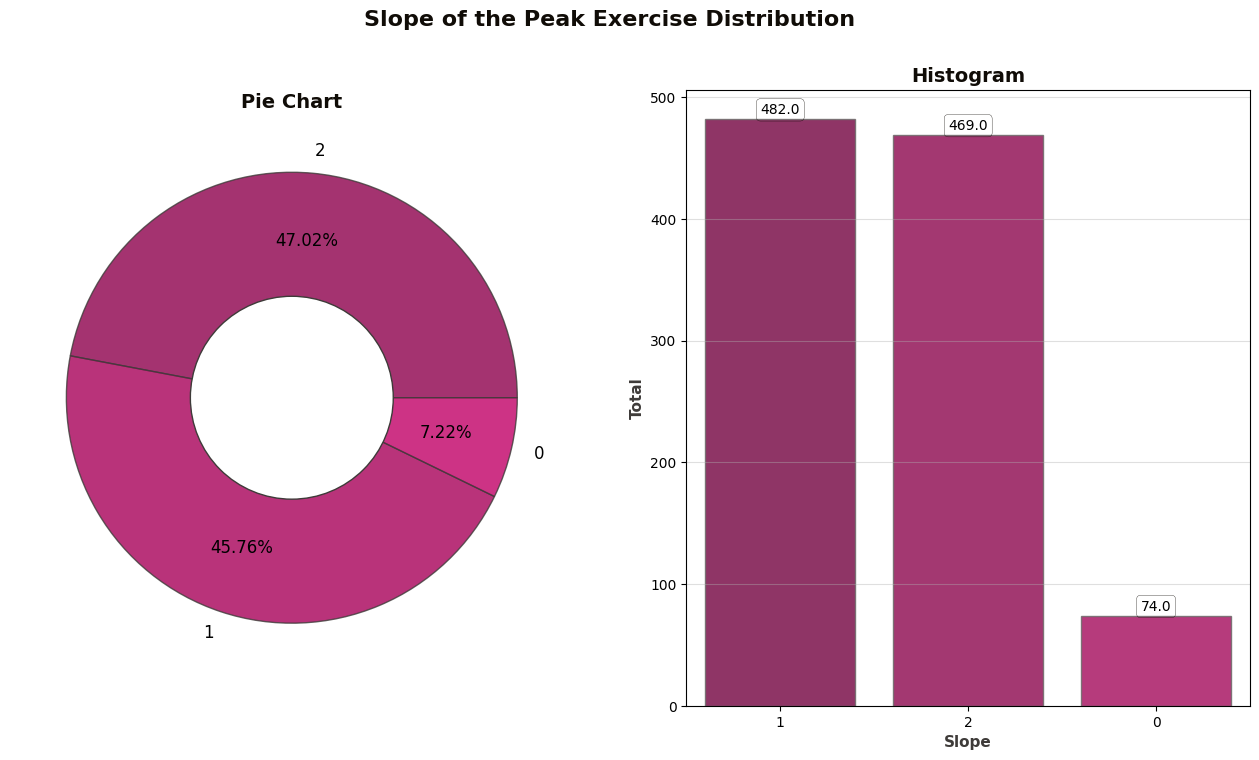

In [11]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad[2:5]
labels=['2', '1', '0']
order=df['slope'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Slope of the Peak Exercise Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
plt.pie(df['slope'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)


# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='slope', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Slope', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt
# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: Slope Total :.'+'\033[0m')
print('*' * 20)
df.slope.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;">  ca (Number of Major Vessels)</div>

****************************************
.: Number of Major Vessels Total :.
****************************************


0    578
1    226
2    134
3     69
4     18
Name: ca, dtype: int64

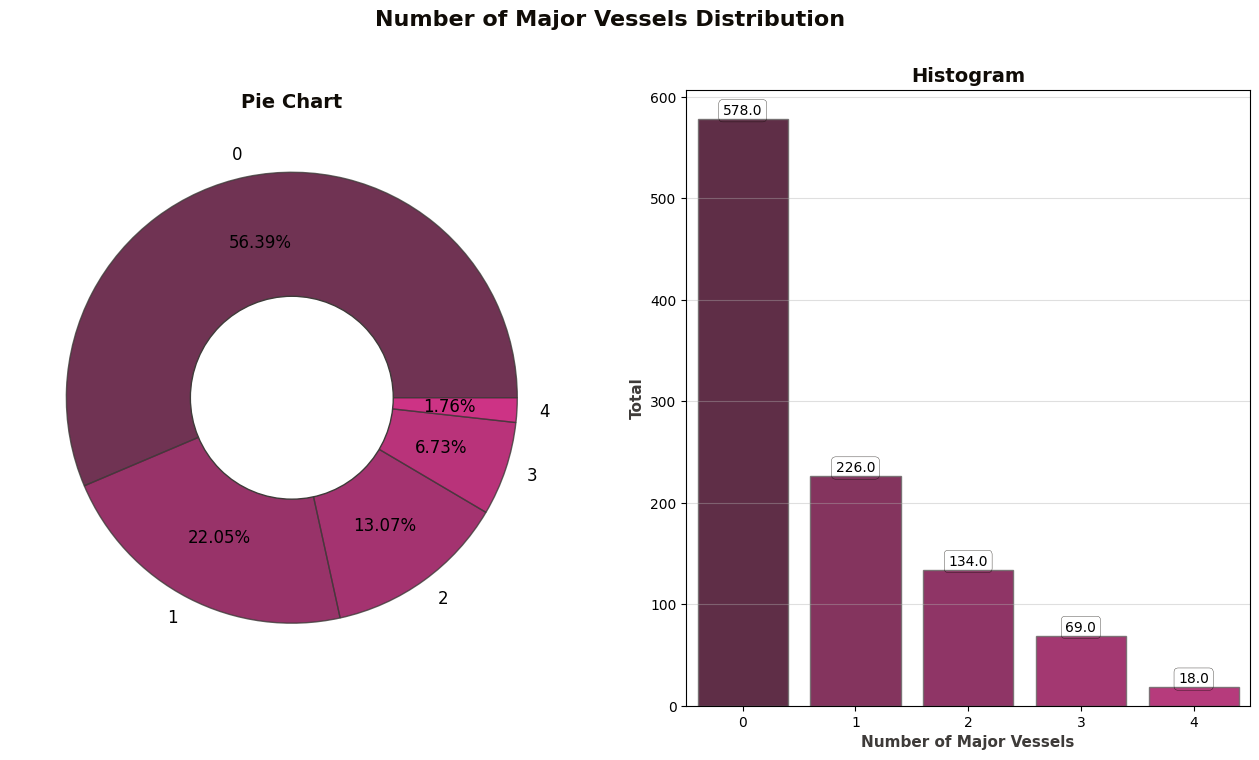

In [12]:
# --- Setting Colors, Labels, Order ---
colors=purple_grad
labels=['0', '1', '2', '3', '4']
order=df['ca'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16, 8))
plt.suptitle('Number of Major Vessels Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['ca'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='ca', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of Major Vessels', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 40)
print('\033[1m'+'.: Number of Major Vessels Total :.'+'\033[0m')
print('*' * 40)
df.ca.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> thal</div>

********************
.: "thal" Total :.
********************


2    544
3    410
1     64
0      7
Name: thal, dtype: int64

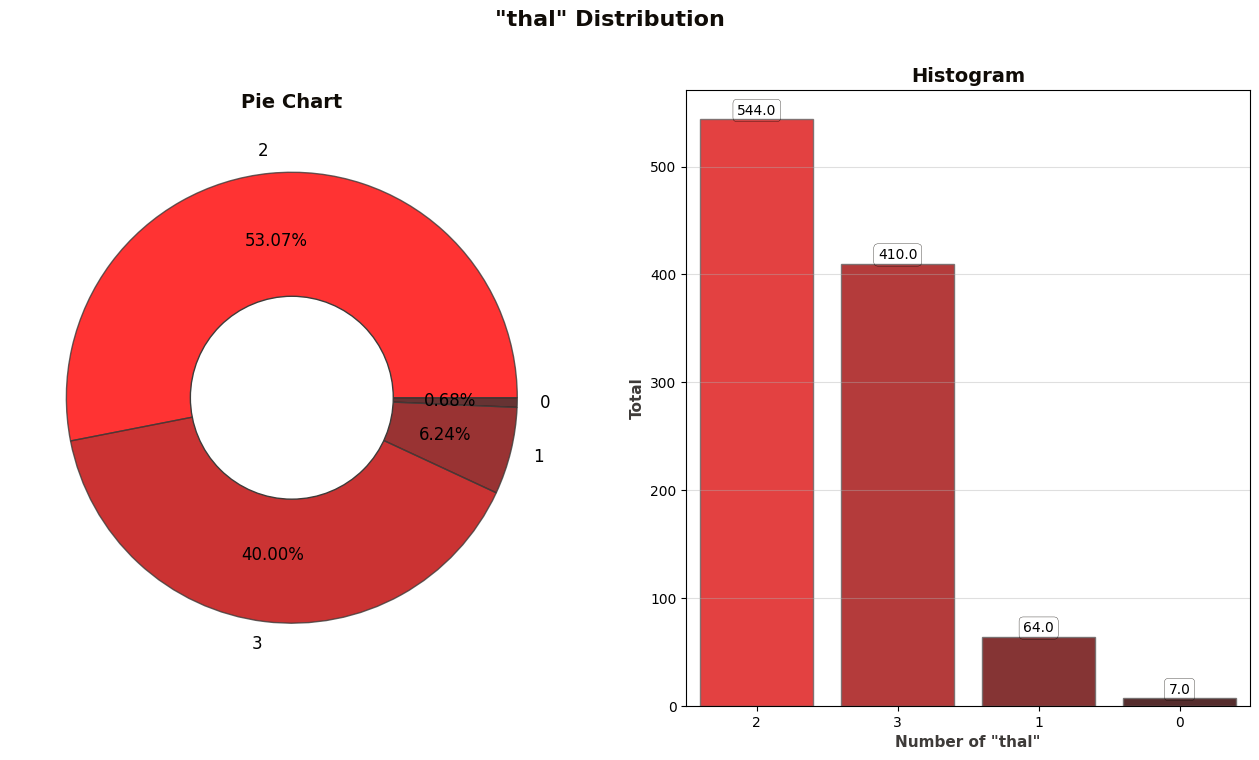

In [13]:
# --- Setting Colors, Labels, Order ---
colors=red_grad[0:4]
labels=['2', '3', '1', '0']
order=df['thal'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('"thal" Distribution', fontweight='heavy', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
plt.pie(df['thal'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), 
        autopct='%.2f%%', pctdistance=0.7, textprops={'fontsize':12})

centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='thal', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Number of "thal"', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 20)
print('\033[1m'+'.: "thal" Total :.'+'\033[0m')
print('*' * 20)
df.thal.value_counts(dropna=False)

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> target (Heart Diseases Status)</div>

*********************************************
.: Heart Diseases Status (target) Total :.
*********************************************


1    526
0    499
Name: target, dtype: int64

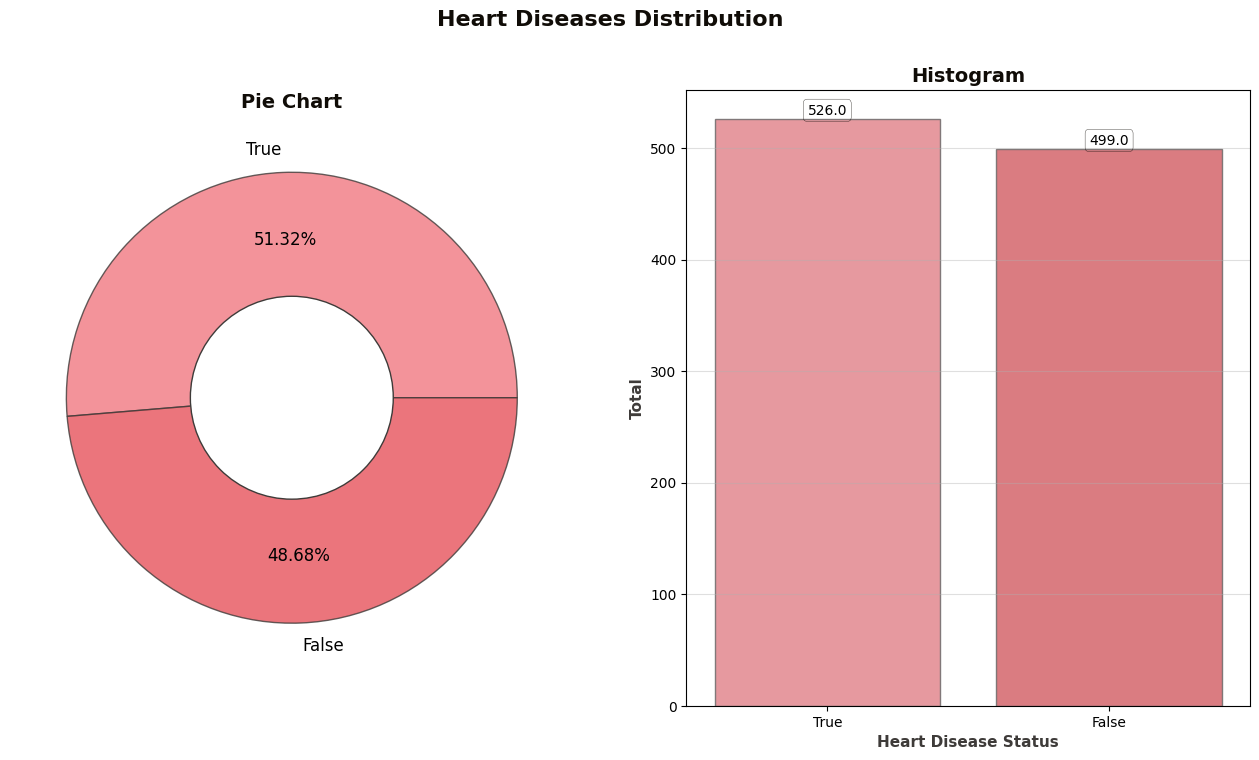

In [14]:
# --- Setting Colors, Labels, Order ---
colors=color_mix[3:5]
labels=['True', 'False']
order=df['target'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(16,8))
plt.suptitle('Heart Diseases Distribution', fontweight='heavy', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Pie Chart', fontweight='bold', fontsize=14, fontfamily='sans-serif',
          color=black_grad[0])
plt.pie(df['target'].value_counts(), labels=labels, colors=colors, 
        wedgeprops=dict(alpha=0.8, edgecolor=black_grad[1]), autopct='%.2f%%',
        pctdistance=0.7, textprops={'fontsize':12})
centre=plt.Circle((0, 0), 0.45, fc='white', edgecolor=black_grad[1])
plt.gcf().gca().add_artist(centre)

# --- Histogram ---
countplt = plt.subplot(1, 2, 2)
plt.title('Histogram', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[0])
ax = sns.countplot(x='target', data=df, palette=colors, order=order,
                   edgecolor=black_grad[2], alpha=0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+4.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10,
             bbox=dict(facecolor='none', edgecolor=black_grad[0], linewidth=0.25,
                       boxstyle='round'))

plt.xlabel('Heart Disease Status', fontweight='bold', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])
plt.xticks([0, 1], labels)
plt.grid(axis='y', alpha=0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('*' * 45)
print('\033[1m'+'.: Heart Diseases Status (target) Total :.'+'\033[0m')
print('*' * 45)
df.target.value_counts(dropna=False)

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Numerical Variable 🔢</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 The second variable that will be explored is <b>numerical variable</b>.
</div>

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Descriptive Statistics 📏</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show <b>descriptive statistics</b> of numerical variables.
</div>

In [15]:
# --- Descriptive Statistics ---
df.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

### <div style="font-family: Trebuchet MS; background-color: #FF5C8A; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Continuous Column Distribution 📈</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will show the <b>distribution of numerical variables</b> in histograms, boxplots, Q-Q Plots, skewness and kurtosis values.
</div>

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.249
Kurtosis: -0.526




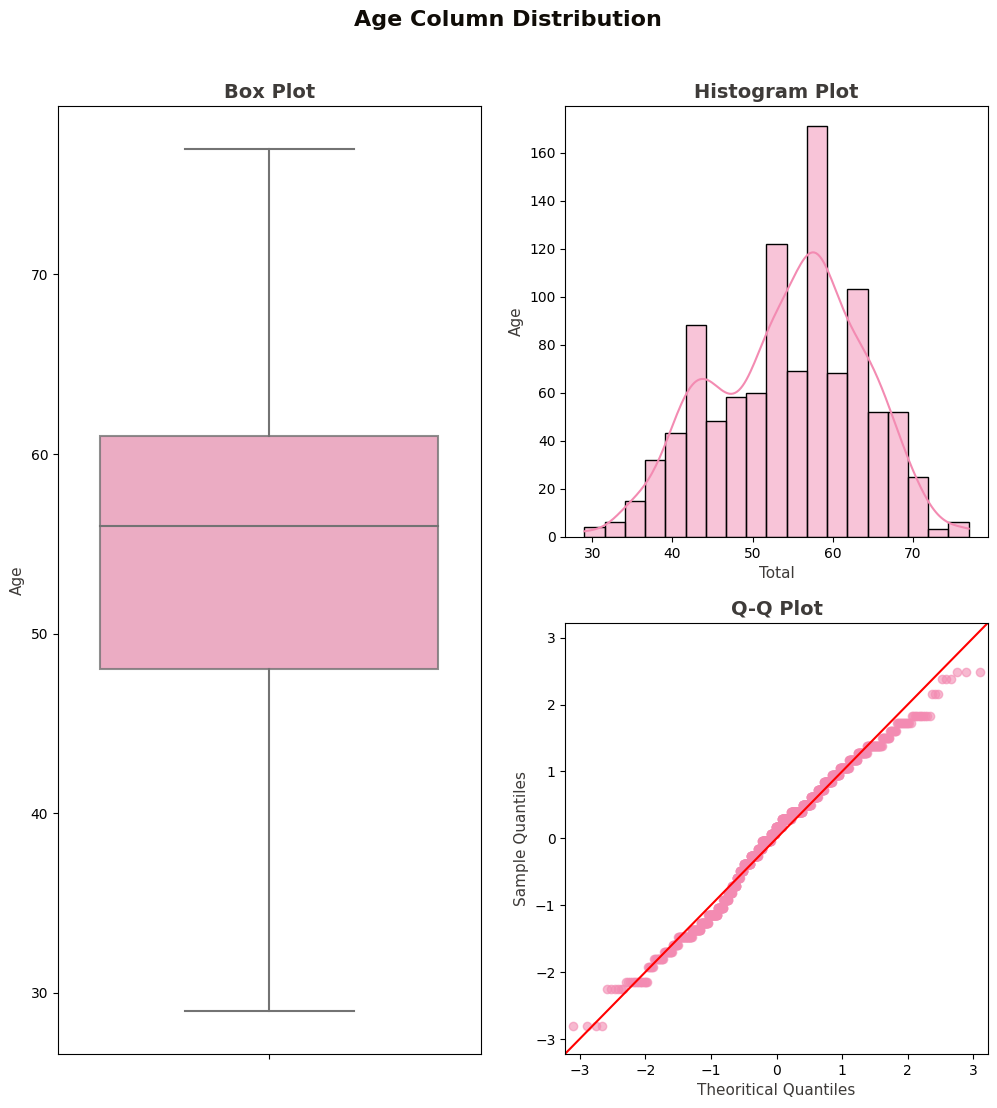

In [16]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = color_mix[0]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Age', fontweight='regular', fontsize=11, fontfamily='sans-serif', 
           color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  trestbps (Resting Blood Pressure in mm Hg) </h4>

.: Resting Blood Pressure Column Skewness & Kurtosis :.
*******************************************************
Skewness: 0.740
Kurtosis: 0.991




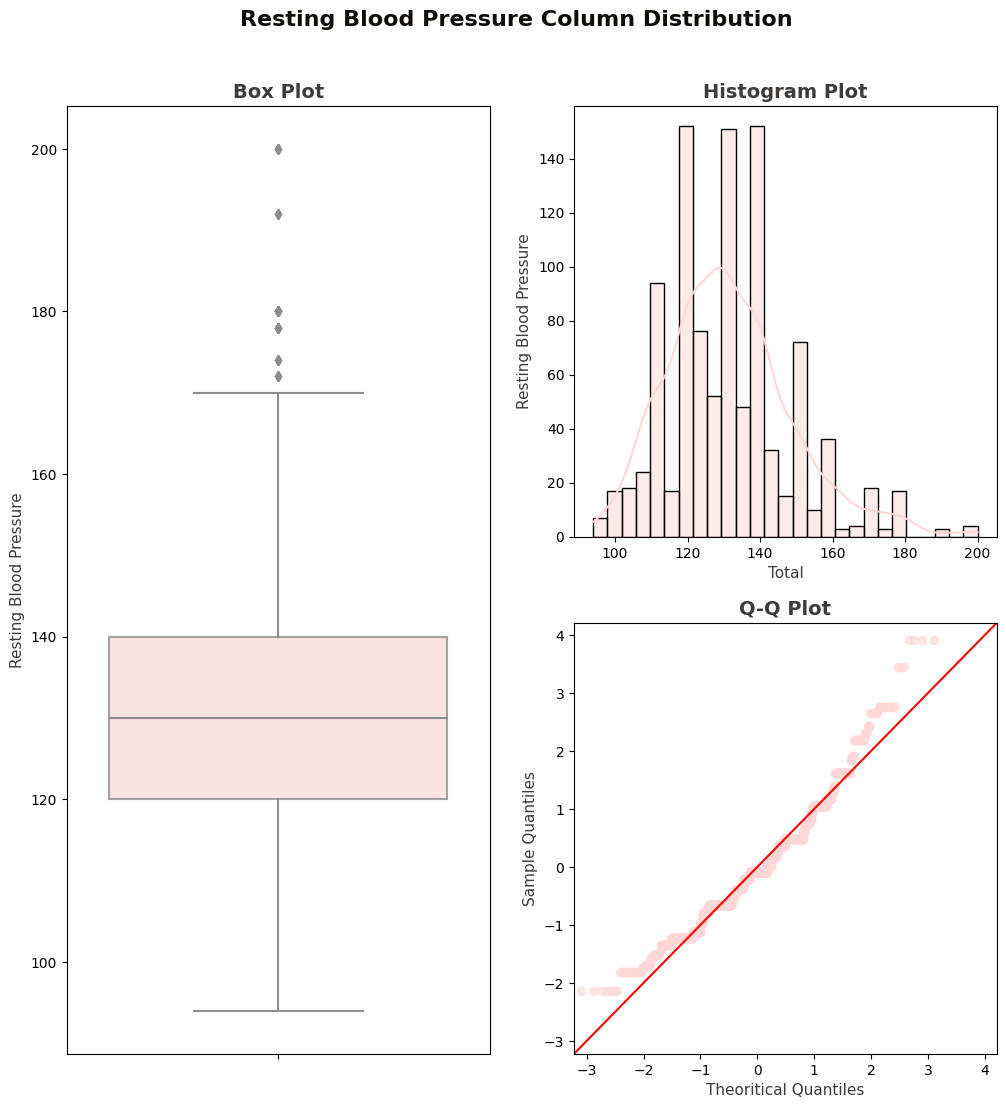

In [17]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = color_mix[2]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting Blood Pressure Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 55)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting Blood Pressure Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting Blood Pressure', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  chol (Serum Cholestoral in mg/dl) </h4>

.: Serum Cholestoral Column Skewness & Kurtosis :.
*********************************************
Skewness: 1.074
Kurtosis: 3.997




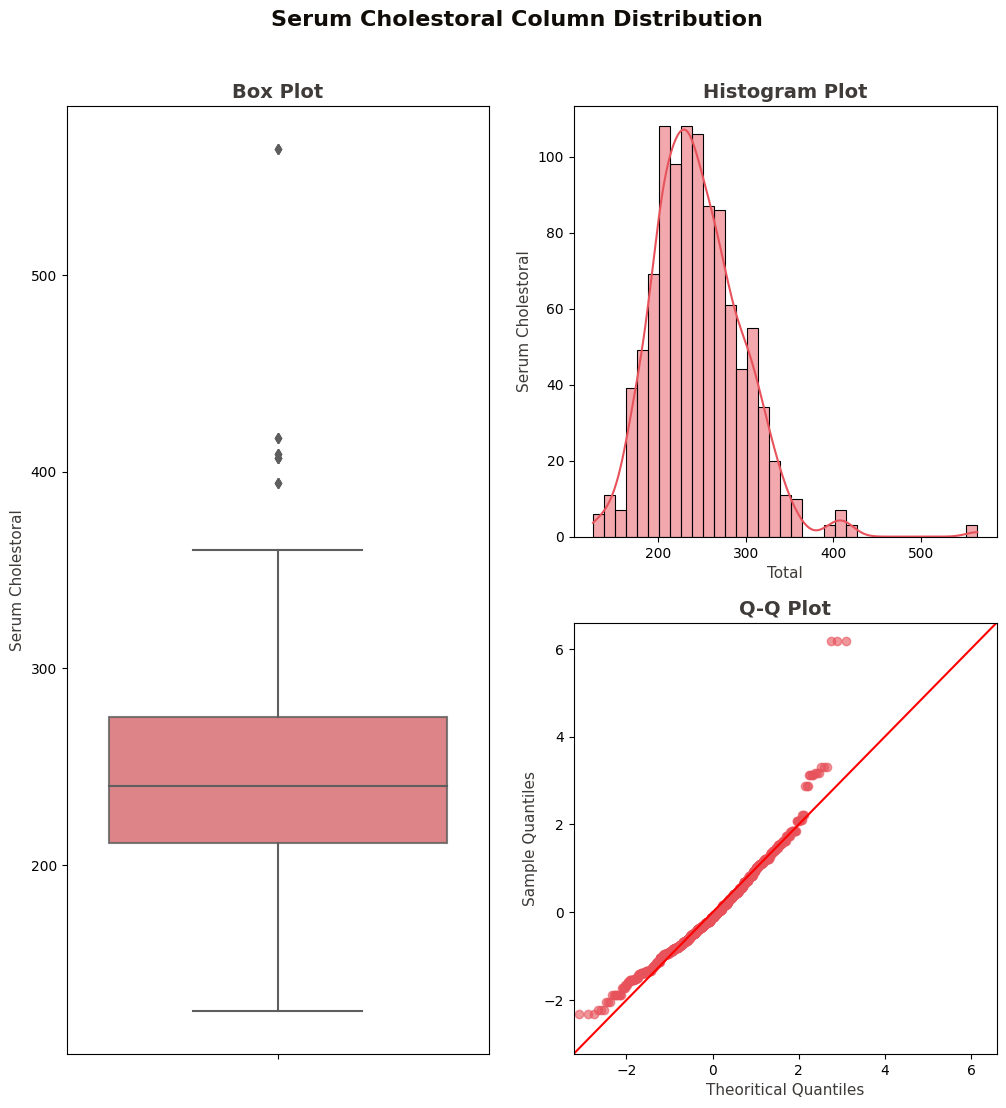

In [18]:
# --- Variable, Color & Plot Size ---
var = 'cholesterol'
color = color_mix[4]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Serum Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 45)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Serum Cholestoral Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])
# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Serum Cholestoral', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;">  thalach (Maximum Heart Rate) </h4>

.: Maximum Heart Rate Column Skewness & Kurtosis :.
**************************************************
Skewness: -0.514
Kurtosis: -0.089




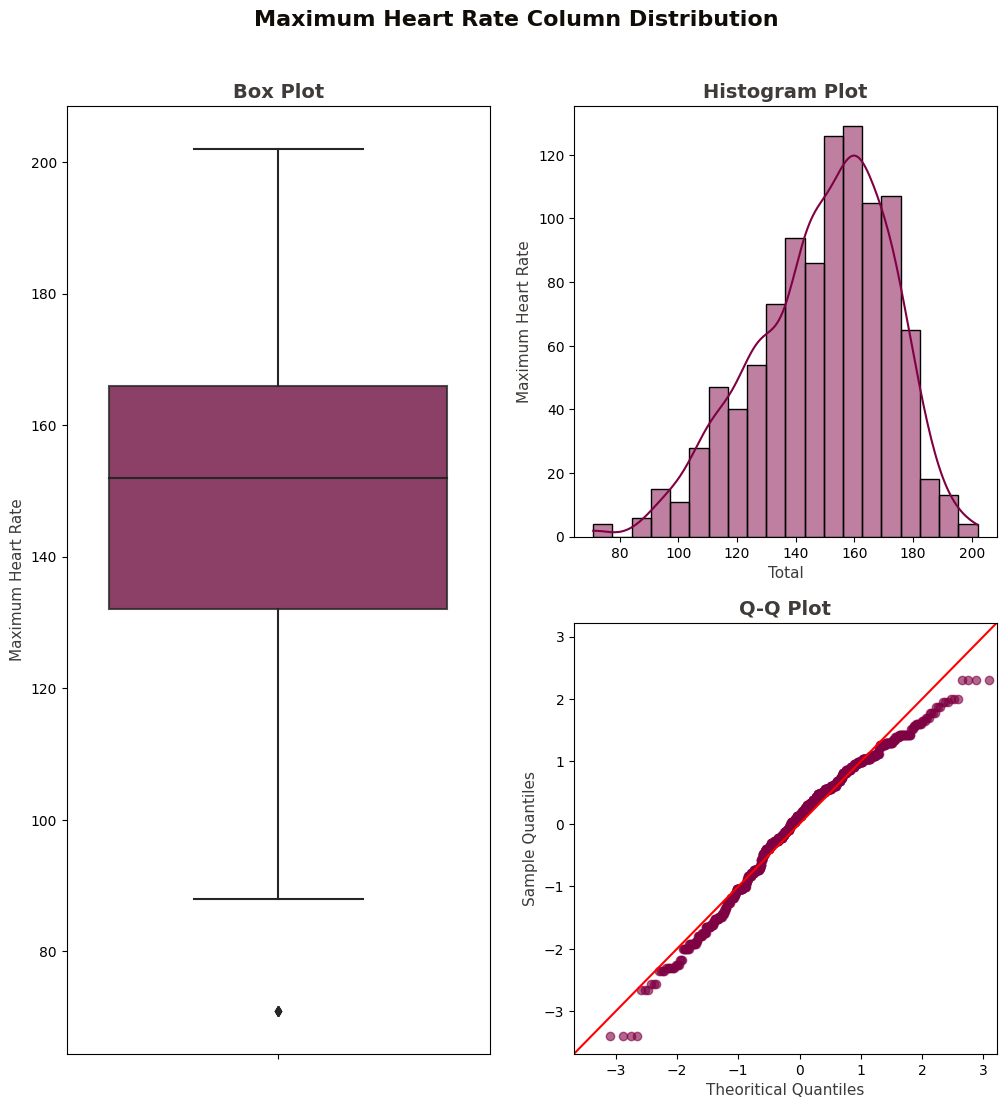

In [19]:
# --- Variable, Color & Plot Size ---
var = 'thalach'
color = purple_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Maximum Heart Rate Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 50)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Maximum Heart Rate Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Maximum Heart Rate', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

#### <h4 style="font-family: Trebuchet MS; background-color: #FF99B9; color: #FFFFFF; padding: 12px; line-height: 1.5;"> oldpeak </h4>

.: "oldpeak" Column Skewness & Kurtosis :.
****************************************
Skewness: 1.211
Kurtosis: 1.314




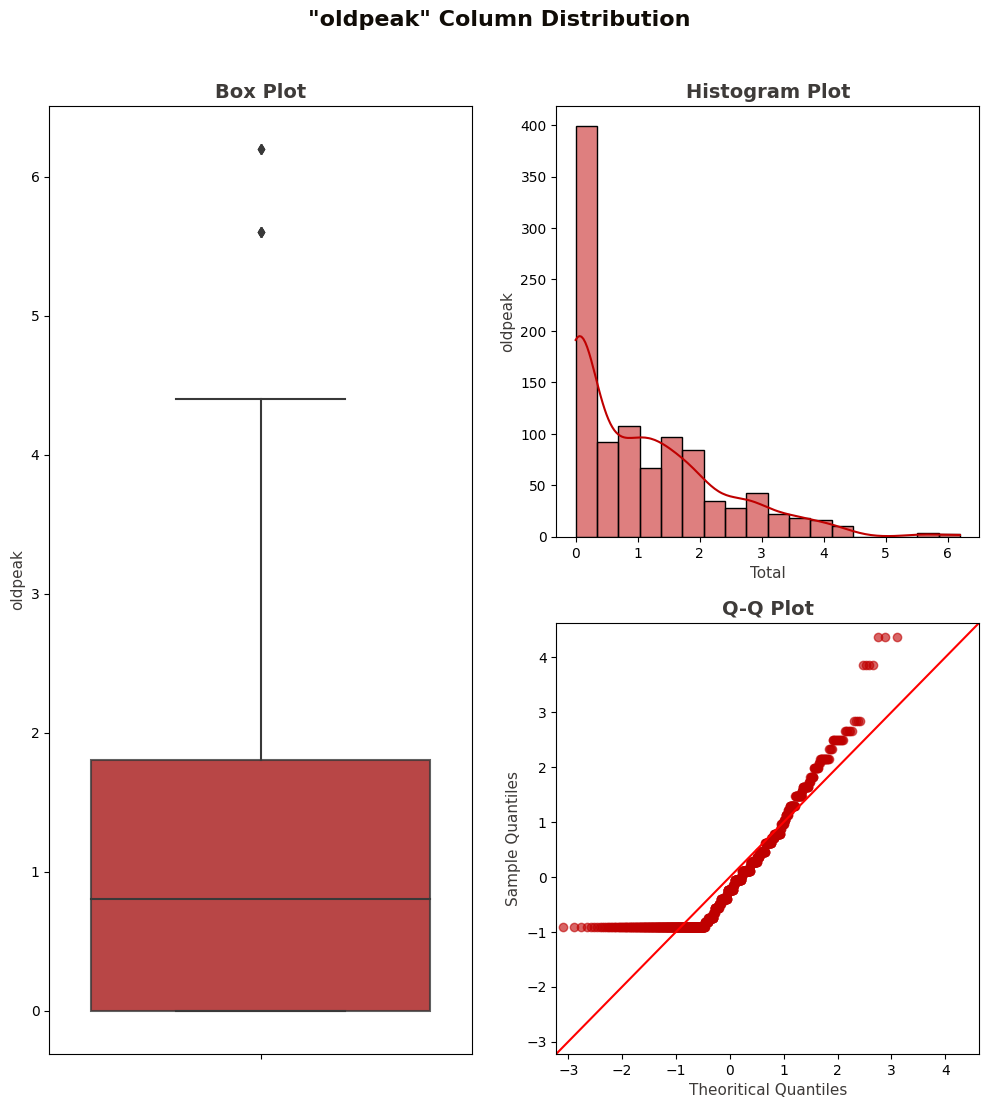

In [20]:
# --- Variable, Color & Plot Size ---
var = 'oldpeak'
color = red_grad[1]
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: "oldpeak" Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(df[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(df[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('"oldpeak" Column Distribution', fontweight='bold', 
             fontsize=16, fontfamily='sans-serif', color=black_grad[0])
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.histplot(data=df, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('oldpeak', fontweight='regular', fontsize=11,
           fontfamily='sans-serif', color=black_grad[1])

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, fontfamily='sans-serif', 
          color=black_grad[1])
qqplot(df[var], fit=True, line='45', ax=ax_2, markerfacecolor=color,
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, 
          fontfamily='sans-serif', color=black_grad[1])
sns.boxplot(data=df, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('oldpeak', fontweight='regular', fontsize=11, 
           fontfamily='sans-serif', color=black_grad[1])

plt.show()

# <div style="font-family: Trebuchet MS; background-color: #8A0030; color: #FFFFFF; padding: 12px; line-height: 1.5;"> EDA 📉</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 This section will perform some <b>EDA</b> to get more insights about dataset.

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Distribution based on Gender 💉👫</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on gender.
</div>

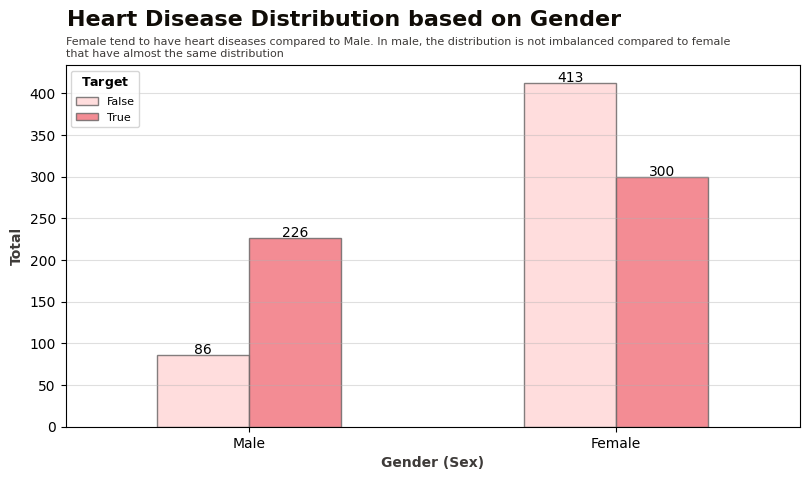

In [21]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Male', 'Female']

# --- Creating Bar Chart ---
ax = pd.crosstab(df.sex, df.target).plot(kind='bar', figsize=(8, 5), 
                                         color=color_mix[2:4], 
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.suptitle('Heart Disease Distribution based on Gender', fontweight='heavy', 
             x=0.065, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Female tend to have heart diseases compared to Male. In male, the distribution is not imbalanced compared to female\nthat have almost the same distribution', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.ylabel('Total', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', 
           title_fontsize='9', loc='upper left', frameon=True);

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;">Heart Disease Distribution based on Major Vessels Total 💉💖</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show heart disease distribution based on number of major vessels.
</div>

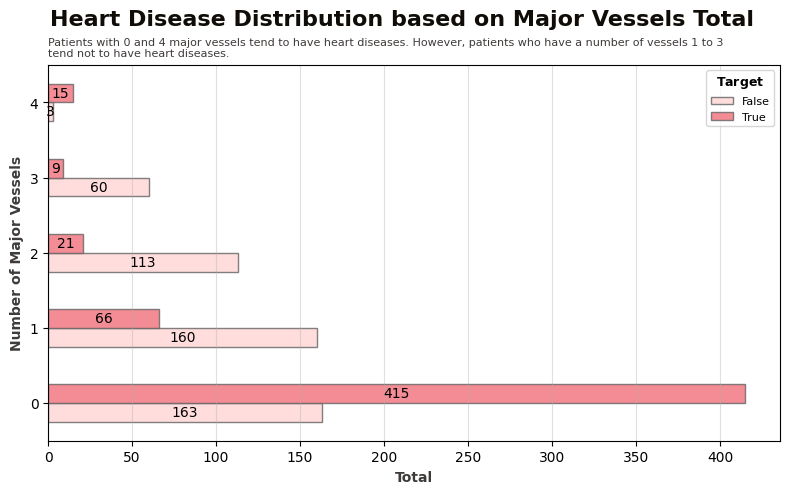

In [22]:
# --- Labels Settings ---
labels = ['False', 'True']

# --- Creating Horizontal Bar Chart ---
ax = pd.crosstab(df.ca, df.target).plot(kind='barh', figsize=(8, 5), 
                                         color=color_mix[2:4],
                                         edgecolor=black_grad[2], alpha=0.85)
# --- Horizontal Bar Chart Settings ---
for rect in ax.patches:
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    ax.text (x+width/2, y+height/2, '{:.0f}'.format(width), 
             horizontalalignment='center', verticalalignment='center')

plt.suptitle('Heart Disease Distribution based on Major Vessels Total', 
             fontweight='heavy', x=0.069, y=0.98, ha='left', fontsize='16', 
             fontfamily='sans-serif', color=black_grad[0])
plt.title('Patients with 0 and 4 major vessels tend to have heart diseases. However, patients who have a number of vessels 1 to 3\ntend not to have heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Total', fontfamily='sans-serif', fontweight='bold', color=black_grad[1])
plt.ylabel('Number of Major Vessels', fontfamily='sans-serif', fontweight='bold', 
           color=black_grad[1])
plt.yticks(rotation=0)
plt.grid(axis='x', alpha=0.4)
plt.grid(axis='y', alpha=0)
plt.legend(labels=labels, title='$\\bf{Target}$', fontsize='8', frameon=True,
           title_fontsize='9', loc='upper right');

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heart Disease Scatter Plot based on Age 💉👴</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
👉 This section will show <b>scatter plot</b> of patients with heart diseases based on age.
</div>

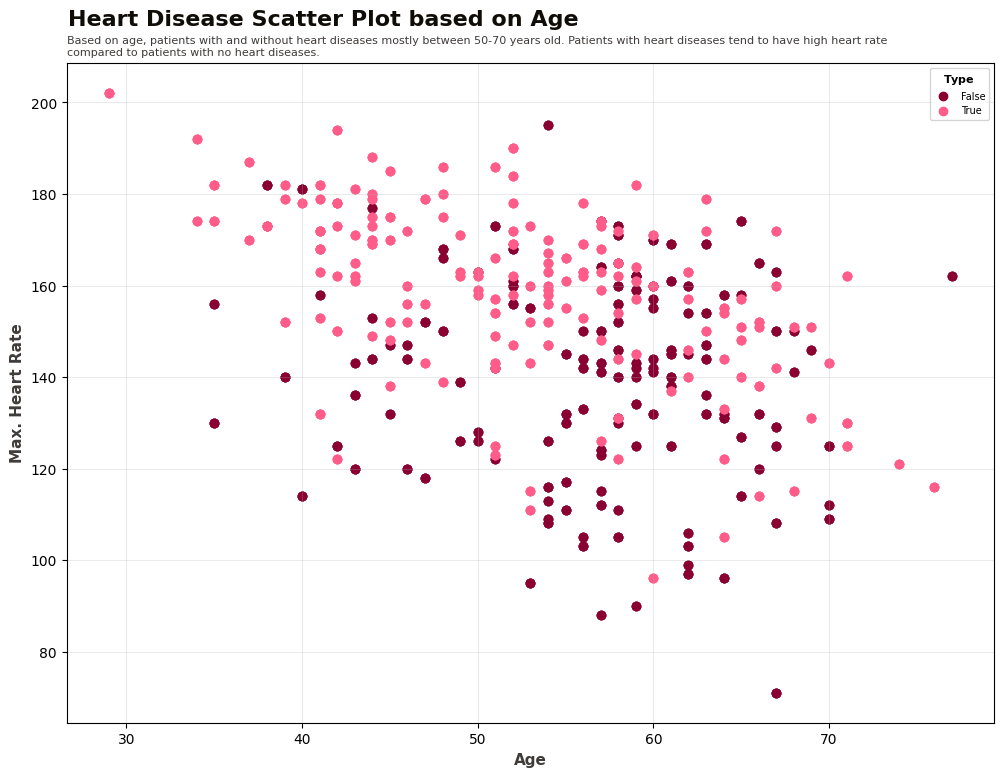

In [23]:
# -- Scatter Plot Size & Titles Settings ---
plt.figure(figsize=(10, 8))
plt.suptitle('Heart Disease Scatter Plot based on Age', fontweight='heavy', 
             x=0.048, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Based on age, patients with and without heart diseases mostly between 50-70 years old. Patients with heart diseases tend to have high heart rate\ncompared to patients with no heart diseases.', 
          fontsize='8', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

# --- Creating Scatter Plot ---
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)], c=pink_grad[0])
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c=pink_grad[2])

# --- Scatter Plot Legend & Labels Settings ---
plt.legend(['False', 'True'], title='$\\bf{Type}$', fontsize='7', 
           title_fontsize='8', loc='upper right', frameon=True)
plt.xlabel('Age', fontweight='bold', fontsize='11',
           fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Max. Heart Rate', fontweight='bold', fontsize='11', 
           fontfamily='sans-serif', color=black_grad[1])
plt.ticklabel_format(style='plain', axis='both')
plt.grid(axis='both', alpha=0.4, lw=0.5)
plt.show();

## <div style="font-family: Trebuchet MS; background-color: #BA1141; color: #FFFFFF; padding: 12px; line-height: 1.5;"> Heatmap 🔥</div>
<div style="font-family: Segoe UI; line-height: 2; color: #000000; text-align: justify">
    👉 Below is <b>correlation map/heatmap of numerical variables</b> to show correlation level/values for each variables with others.
</div>

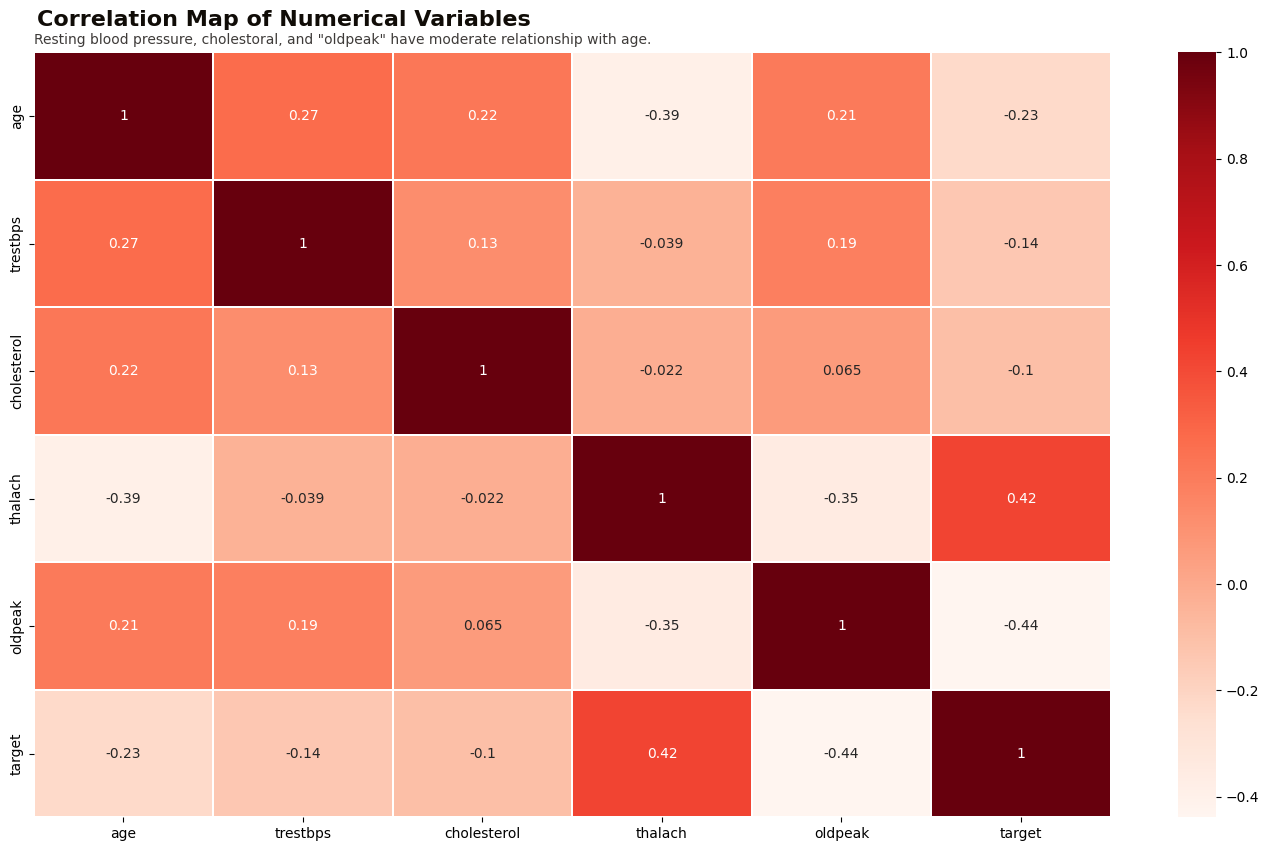

In [24]:
# --- Correlation Map (Heatmap) ---
plt.figure(figsize=(14, 9))
sns.heatmap(df.corr(), annot=True, cmap='Reds', linewidths=0.1)
plt.suptitle('Correlation Map of Numerical Variables', fontweight='heavy', 
             x=0.03, y=0.98, ha='left', fontsize='16', fontfamily='sans-serif', 
             color=black_grad[0])
plt.title('Resting blood pressure, cholestoral, and "oldpeak" have moderate relationship with age.', 
          fontsize='10', fontfamily='sans-serif', loc='left', color=black_grad[1])
plt.tight_layout(rect=[0, 0.04, 1, 1.01])

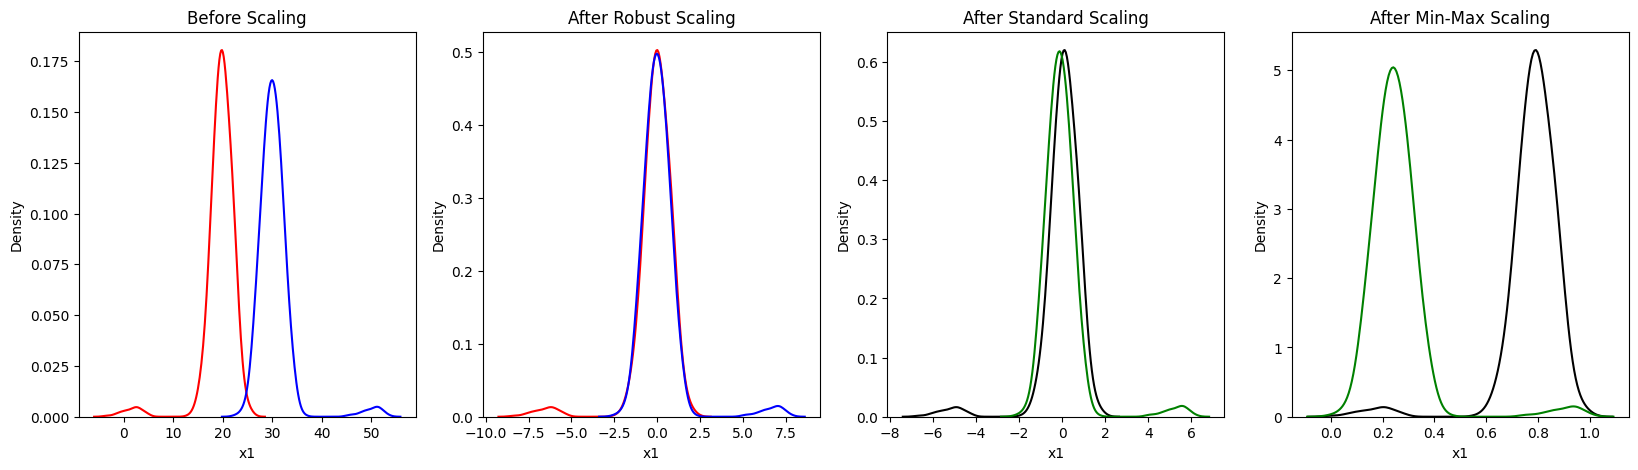

In [25]:
# data
x = pd.DataFrame({
    # Distribution with lower outliers
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    # Distribution with higher outliers
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})
np.random.normal
 
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns =['x1', 'x2'])
 
scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns =['x1', 'x2'])
 
scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns =['x1', 'x2'])
 
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols = 4, figsize =(20, 5))
ax1.set_title('Before Scaling')
 
sns.kdeplot(x['x1'], ax = ax1, color ='r')
sns.kdeplot(x['x2'], ax = ax1, color ='b')
ax2.set_title('After Robust Scaling')
 
sns.kdeplot(robust_df['x1'], ax = ax2, color ='red')
sns.kdeplot(robust_df['x2'], ax = ax2, color ='blue')
ax3.set_title('After Standard Scaling')
 
sns.kdeplot(standard_df['x1'], ax = ax3, color ='black')
sns.kdeplot(standard_df['x2'], ax = ax3, color ='g')
ax4.set_title('After Min-Max Scaling')
 
sns.kdeplot(minmax_df['x1'], ax = ax4, color ='black')
sns.kdeplot(minmax_df['x2'], ax = ax4, color ='g')
plt.show()

# Preprocessing

## Feature Scaling - StandardScaler

In [26]:
numerical_columns = list(data.loc[:,['age', 'sex', 'chestpain', 'trestbps', 'cholesterol', 'fastbs',
       'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']])

In [27]:

# Creating function for scaling
def Standard_Scaler (df, col_names):
    features = df[col_names]
    scaler = StandardScaler().fit(features.values)
    features = scaler.transform(features.values)
    df[col_names] = features
    
    return df

In [28]:
col_names = numerical_columns
df = Standard_Scaler (df, col_names)

In [29]:
df.head()

age       sex  chestpain  trestbps  cholesterol    fastbs   restecg  \
0 -0.268437  0.661504  -0.915755 -0.377636    -0.659332 -0.418878  0.891255   
1 -0.158157  0.661504  -0.915755  0.479107    -0.833861  2.387330 -1.004049   
2  1.716595  0.661504  -0.915755  0.764688    -1.396233 -0.418878  0.891255   
3  0.724079  0.661504  -0.915755  0.936037    -0.833861 -0.418878  0.891255   
4  0.834359 -1.511706  -0.915755  0.364875     0.930822  2.387330  0.891255   

    thalach     exang   oldpeak     slope        ca      thal  target  
0  0.821321 -0.712287 -0.060888  0.995433  1.209221  1.089852       0  
1  0.255968  1.403928  1.727137 -2.243675 -0.731971  1.089852       0  
2 -1.048692  1.403928  1.301417 -2.243675 -0.731971  1.089852       0  
3  0.516900 -0.712287 -0.912329  0.995433  0.238625  1.089852       0  
4 -1.874977 -0.712287  0.705408 -0.624121  2.179817 -0.522122       0

# **Split into Training and Testing data**

In [30]:
X = df.drop(['target'],axis = 1)
y = df['target']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, train_size=0.6,random_state=100)

# **Model Formulation**
Since we are dealing with multi-class classification problem, we will be using several machine learning algorithms:

0. KNN
1. KNN with HT
2. Decision Tree
3. Decision Tree with HT
4. Logistic regression
5. Logistic regression with HT
6. SVM
7. SVM with HT
8. Random Forest
9. XgBoost

We will record all the experiment in the dictionary below. `[model, accuracy, time]`

In [32]:
models = {
    "sklearn": [],
    "tf": []
}

# **KNN Model**

In [33]:
knn = KNeighborsClassifier(n_neighbors=10)  # Adjust the value of k
knn.fit(X_train, y_train)

accuracy = knn.score(X_test, y_test)
print('Accuracy:', accuracy)

Accuracy: 0.8268292682926829


In [34]:
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       189
           1       0.85      0.82      0.84       221

    accuracy                           0.83       410
   macro avg       0.83      0.83      0.83       410
weighted avg       0.83      0.83      0.83       410



Precision: 0.8504672897196262
Recall: 0.8235294117647058
F1-Score: 0.8367816091954022


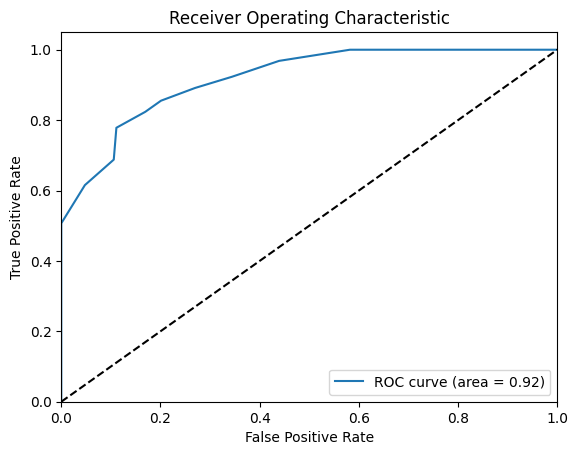

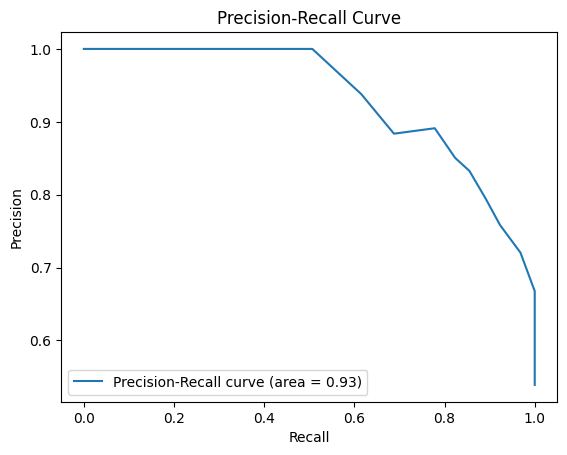

In [35]:
# Calculate precision, recall, and F1-score
y_pred = knn.predict(X_test)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

#append to models
models["sklearn"].append((knn, accuracy, f1))

# Calculate ROC curve and AUC
y_pred_proba = knn.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


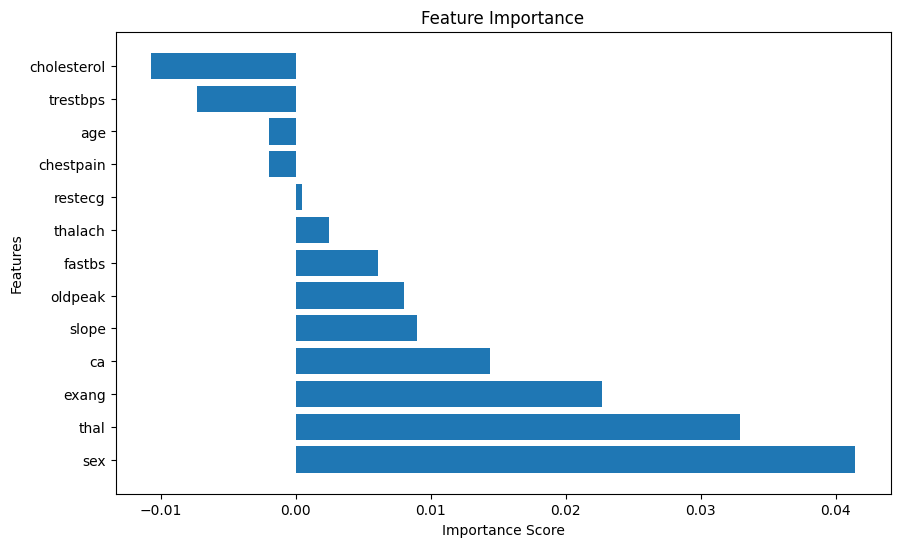

In [36]:

# Perform permutation importance
result = permutation_importance(knn, X_test, y_test, n_repeats=10, random_state=42)

# Get feature importance scores
importance_scores = result.importances_mean

# Get feature names
feature_names = X.columns  # Replace X with your feature matrix

# Sort feature importance scores and feature names in descending order
sorted_indices = np.argsort(importance_scores)[::-1]
sorted_importance_scores = importance_scores[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_importance_scores)), sorted_importance_scores, align='center')
plt.yticks(range(len(sorted_importance_scores)), sorted_feature_names)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance')
plt.show()

Sensitivity: 0.8235294117647058
Specificity: 0.8306878306878307
Positive Predictive Value (PPV): 0.8504672897196262


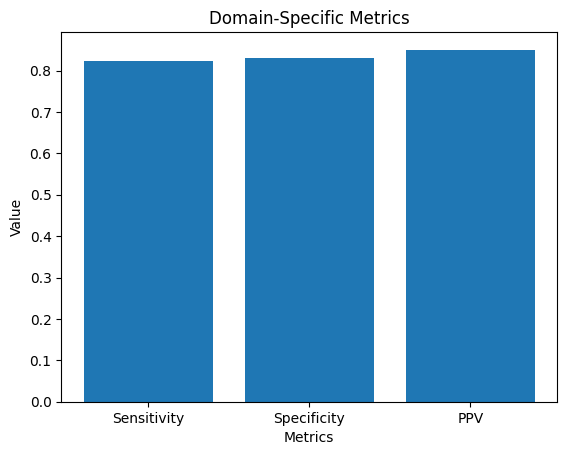

In [37]:

# Calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Calculate positive predictive value (PPV) or precision
ppv = tp / (tp + fp)

# Create a bar plot
metrics = ['Sensitivity', 'Specificity', 'PPV']
values = [sensitivity, specificity, ppv]

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Domain-Specific Metrics')
plt.show()

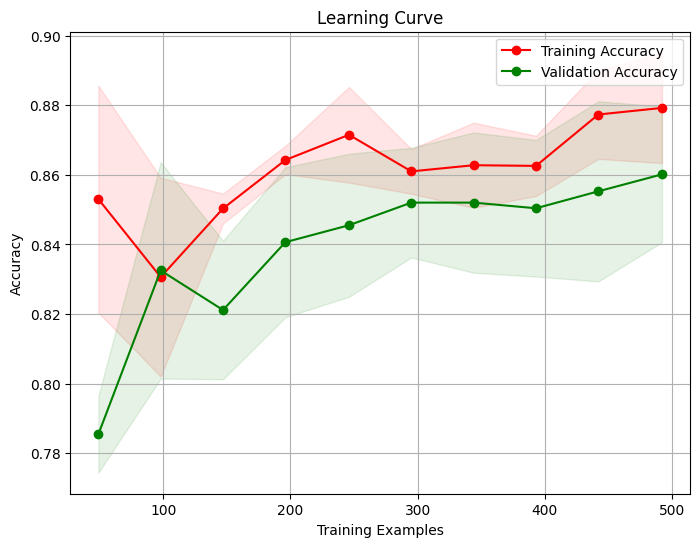

In [38]:
def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
    )

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title("Learning Curve")
    plt.xlabel("Training Examples")
    plt.ylabel("Accuracy")

    plt.grid()
    plt.fill_between(
        train_sizes,
        train_scores_mean - train_scores_std,
        train_scores_mean + train_scores_std,
        alpha=0.1,
        color="r",
    )
    plt.fill_between(
        train_sizes,
        test_scores_mean - test_scores_std,
        test_scores_mean + test_scores_std,
        alpha=0.1,
        color="g",
    )
    plt.plot(
        train_sizes, train_scores_mean, "o-", color="r", label="Training Accuracy"
    )
    plt.plot(
        train_sizes, test_scores_mean, "o-", color="g", label="Validation Accuracy"
    )
    plt.legend(loc="best")
    plt.show()
# Plot the learning curve
plot_learning_curve(knn, X_train, y_train)

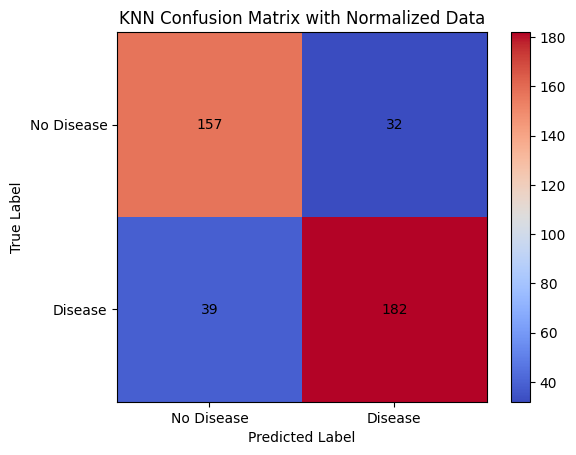

In [39]:

# Calculate the confusion matrix
cf = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))

# Define the labels and categories for the confusion matrix plot
labels = ['No Disease', 'Disease']
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create the confusion matrix plot
plt.imshow(cf, cmap='coolwarm', interpolation='nearest')
plt.title("KNN Confusion Matrix with Normalized Data")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Fill the confusion matrix cells with category values
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cf[i][j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hyperparameter Tuning 

Best Parameters: {'n_neighbors': 7, 'weights': 'distance'}
Best Score: 0.9495934959349593
Mean Cross-Validation Score: 0.9495934959349593
Accuracy: 0.9634146341463414
F1 Score: 0.9653579676674364
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       189
           1       0.99      0.95      0.97       221

    accuracy                           0.96       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410



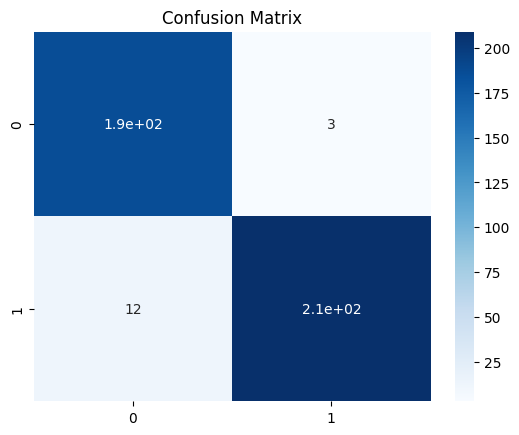

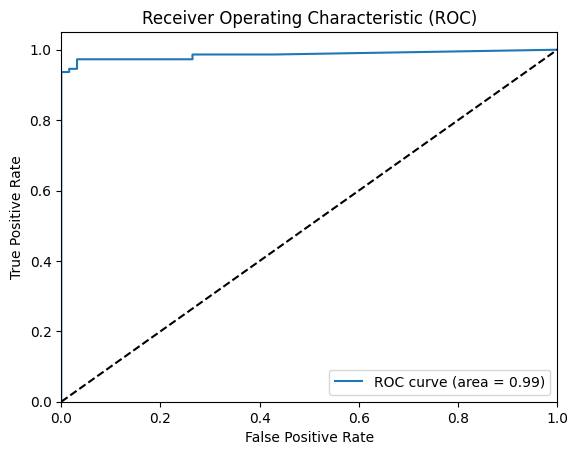

In [40]:
# Scale the features using your custom Standard_Scaler function
X_train_scaled = Standard_Scaler(X_train, col_names)
X_test_scaled = Standard_Scaler(X_test, col_names)

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
}

# Create the KNeighborsClassifier model
knn = KNeighborsClassifier()

# Create the GridSearchCV object with cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best model for prediction
best_model = grid_search.best_estimator_

# Evaluate the best model using cross-validation
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=5)
mean_cv_score = cv_scores.mean()

# Evaluate the best model on the scaled test set
y_pred = best_model.predict(X_test_scaled)
accuracy = best_model.score(X_test_scaled, y_test)
f1 = f1_score(y_test, y_pred)

print("Mean Cross-Validation Score:", mean_cv_score)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")

# Plot the ROC curve
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Print the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Append the best model to the models dictionary
models["sklearn"].append((best_model, accuracy, f1))

## **Decision Tree Model**

In [41]:
# Create a Decision Tree classifier with pre-pruning parameters
dtc = DecisionTreeClassifier(max_depth=5)  # Set the maximum depth of the tree

# Fit the model to the training data
dtc.fit(X_train, y_train)

# Evaluate the model
accuracy = dtc.score(X_test, y_test)
print("Accuracy:", accuracy)

# Predict on the test set
y_pred = dtc.predict(X_test)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

#append to models
models["sklearn"].append((dtc, accuracy, f1))

Accuracy: 0.8365853658536585
Precision: 0.84375
Recall: 0.8552036199095022
F1-score: 0.8494382022471909


In [42]:
# Generate a classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       189
           1       0.84      0.86      0.85       221

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



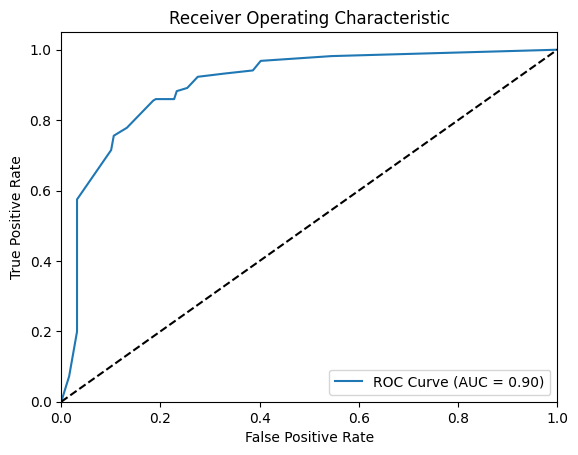

In [43]:
# Predict probabilities on the test set
y_prob = dtc.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC score
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

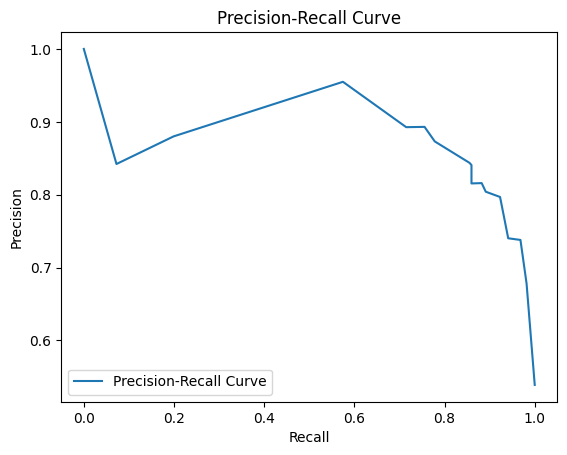

In [44]:

# Predict probabilities on the test set
y_prob = dtc.predict_proba(X_test)[:, 1]

# Calculate precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot the precision-recall curve
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

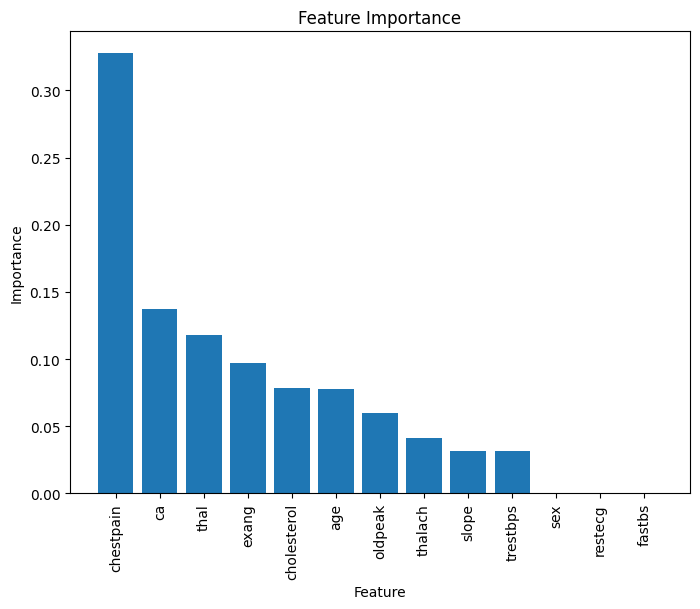

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your trained Decision Tree model stored in the 'dt' variable
feature_importance = dtc.feature_importances_
feature_names = np.array(X.columns)  # Assuming 'X' contains the feature dataset

# Sort feature importances in descending order
sorted_indices = np.argsort(feature_importance)[::-1]
sorted_feature_importance = feature_importance[sorted_indices]
sorted_feature_names = feature_names[sorted_indices]

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(sorted_feature_importance)), sorted_feature_importance)
plt.xticks(range(len(sorted_feature_importance)), sorted_feature_names, rotation='vertical')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [46]:
# Assuming the feature names are the column names of your DataFrame
feature_names = df.columns.tolist()[:-1]

# Assuming the target class column name is 'target'
class_names = [str(class_name) for class_name in df['target'].unique().tolist()]

fig = plt.figure(figsize=(200, 120))
_ = tree.plot_tree(dtc, feature_names=feature_names, class_names=class_names, filled=True)

# Save the figure
fig.savefig('decision_tree.png')

# Display the figure
plt.show()

Sensitivity: 0.8235294117647058
Specificity: 0.8306878306878307
Positive Predictive Value (PPV): 0.8504672897196262


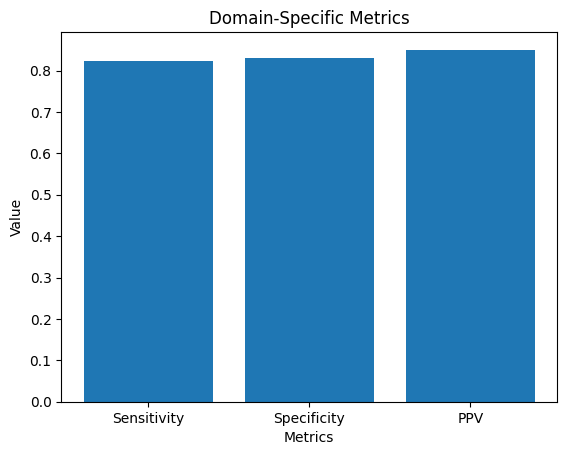

In [47]:
# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Calculate positive predictive value (PPV) or precision
ppv = tp / (tp + fp)

# Create a bar plot
metrics = ['Sensitivity', 'Specificity', 'PPV']
values = [sensitivity, specificity, ppv]

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Domain-Specific Metrics')
plt.show()

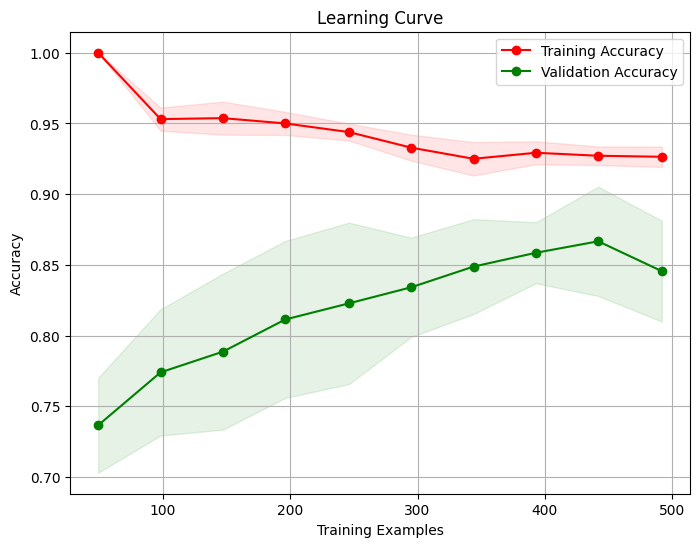

In [48]:
plot_learning_curve(dtc, X_train, y_train)

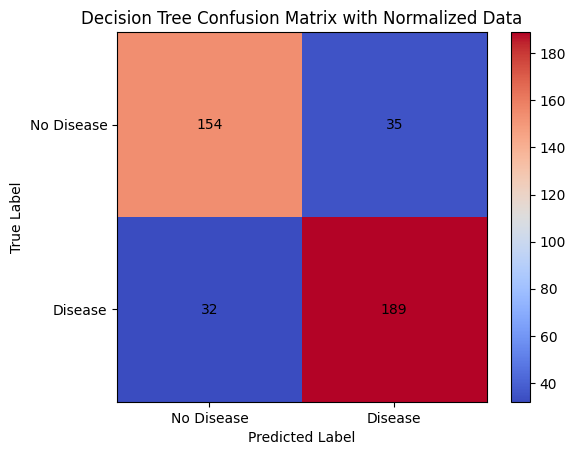

In [49]:
# Calculate the confusion matrix
cf = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))

# Define the labels and categories for the confusion matrix plot
labels = ['No Disease', 'Disease']
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create the confusion matrix plot
plt.imshow(cf, cmap='coolwarm', interpolation='nearest')
plt.title("Decision Tree Confusion Matrix with Normalized Data")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Fill the confusion matrix cells with category values
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cf[i][j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Hyperparameter Tuning

Best Hyperparameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy: 0.8853658536585366
F1 Score: 0.8934240362811792
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       189
           1       0.90      0.89      0.89       221

    accuracy                           0.89       410
   macro avg       0.88      0.88      0.88       410
weighted avg       0.89      0.89      0.89       410



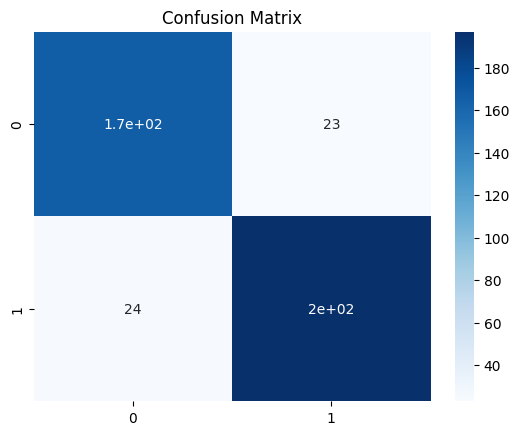

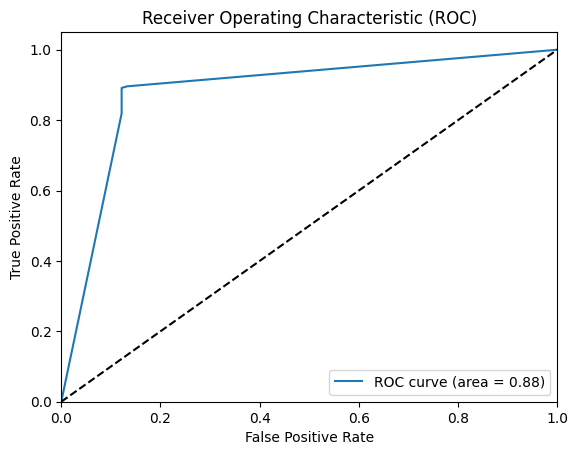

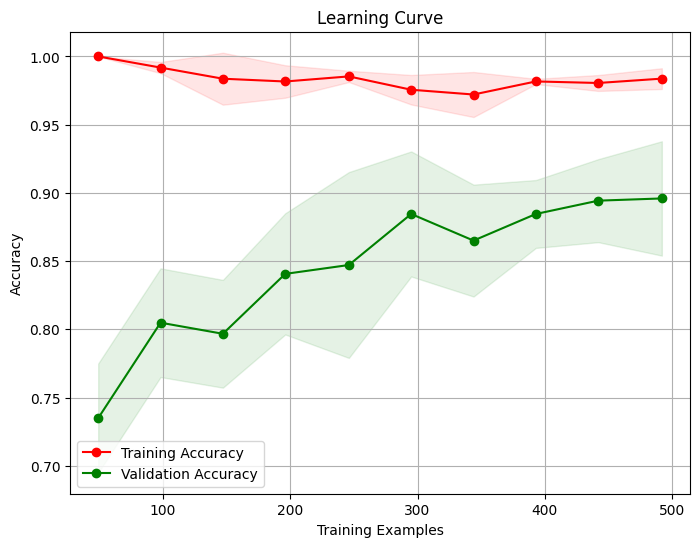

In [50]:

# Create a Decision Tree classifier
dtc = DecisionTreeClassifier()

# Define the hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(dtc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")

# Plot the ROC curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Print the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Append the best model and evaluation metrics to the 'sklearn' key in the models dictionary
models["sklearn"].append((best_model, accuracy, f1))

# Plot the learning curve
plot_learning_curve(best_model, X_train, y_train)

## **Logistic Regression**

In [51]:
# Create and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8439024390243902


In [52]:
# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

#append to models
models["sklearn"].append((model, accuracy, f1))

Precision: 0.8340425531914893
Recall: 0.8868778280542986
F1 Score: 0.8596491228070177


In [53]:
# Print the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       189
           1       0.83      0.89      0.86       221

    accuracy                           0.84       410
   macro avg       0.85      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



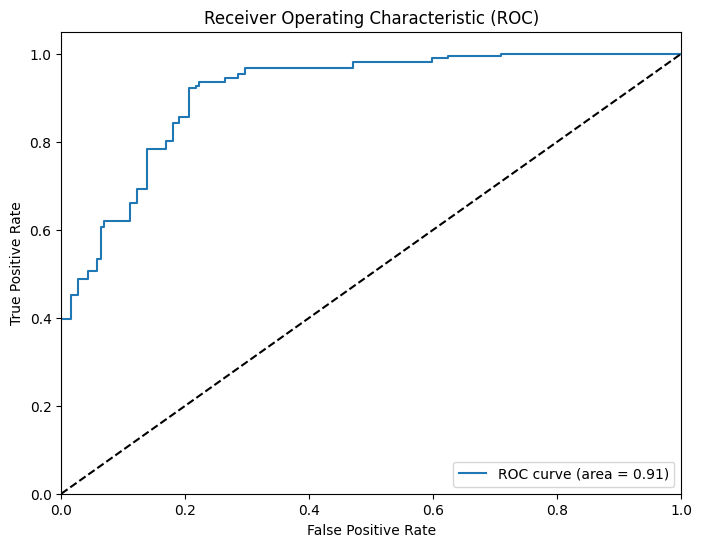

In [54]:
# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [55]:

# Perform cross-validation
scores = cross_val_score(model, X, y, cv=5)  # Replace X and y with your data

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

Cross-Validation Scores: [0.88292683 0.85365854 0.86341463 0.82439024 0.80487805]
Mean Score: 0.8458536585365855


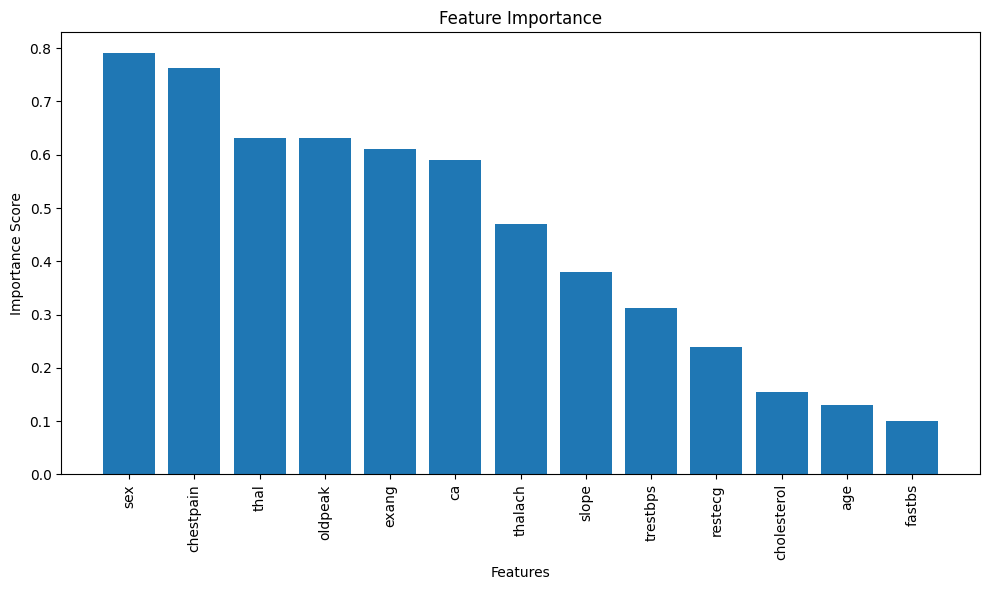

In [56]:
# Get the coefficients from the logistic regression model
coefficients = model.coef_[0]

# Calculate the absolute magnitude of the coefficients
feature_importance = np.abs(coefficients)

# Sort the feature importance in descending order
sorted_indices = np.argsort(feature_importance)[::-1]

# Get the feature names (replace with your feature names)
feature_names = X.columns

# Create a bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_indices)), feature_importance[sorted_indices])
plt.xticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Sensitivity: 0.8235294117647058
Specificity: 0.8306878306878307
Positive Predictive Value (PPV): 0.8504672897196262


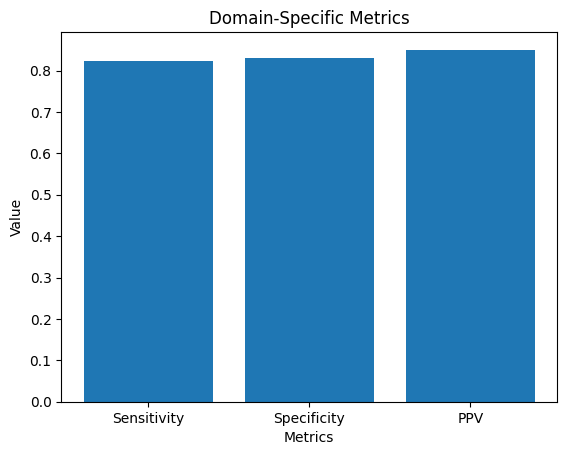

In [57]:
# Calculate sensitivity (true positive rate)
sensitivity = tp / (tp + fn)

# Calculate specificity (true negative rate)
specificity = tn / (tn + fp)

# Calculate positive predictive value (PPV) or precision
ppv = tp / (tp + fp)

print("Sensitivity:", sensitivity)
print("Specificity:", specificity)
print("Positive Predictive Value (PPV):", ppv)

# Create a bar plot
metrics = ['Sensitivity', 'Specificity', 'PPV']
values = [sensitivity, specificity, ppv]

plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Value')
plt.title('Domain-Specific Metrics')
plt.show()

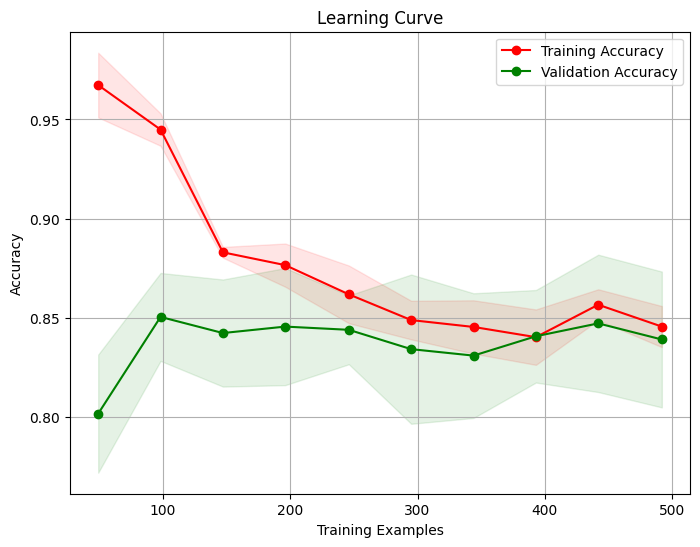

In [58]:
plot_learning_curve(model, X_train, y_train)

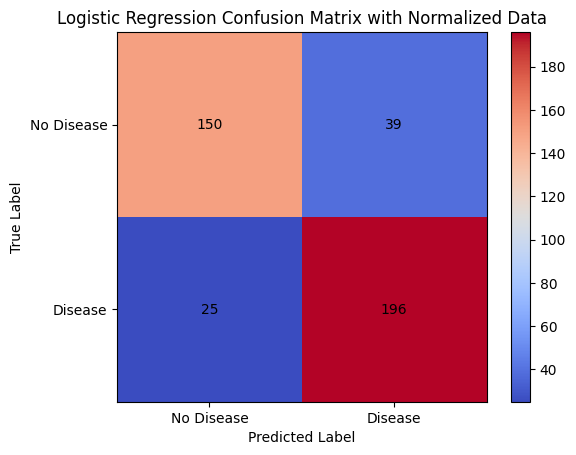

In [59]:
# Calculate the confusion matrix
cf = confusion_matrix(y_test, y_pred)
accuracy = np.trace(cf) / float(np.sum(cf))

# Define the labels and categories for the confusion matrix plot
labels = ['No Disease', 'Disease']
categories = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Create the confusion matrix plot
plt.imshow(cf, cmap='coolwarm', interpolation='nearest')
plt.title("Logistic Regression Confusion Matrix with Normalized Data")
plt.colorbar()

tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)

# Fill the confusion matrix cells with category values
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, str(cf[i][j]), ha='center', va='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


## Hyperparameter Tuning

Best Hyperparameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
Accuracy: 0.8317073170731707
F1 Score: 0.8470066518847007
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       189
           1       0.83      0.86      0.85       221

    accuracy                           0.83       410
   macro avg       0.83      0.83      0.83       410
weighted avg       0.83      0.83      0.83       410



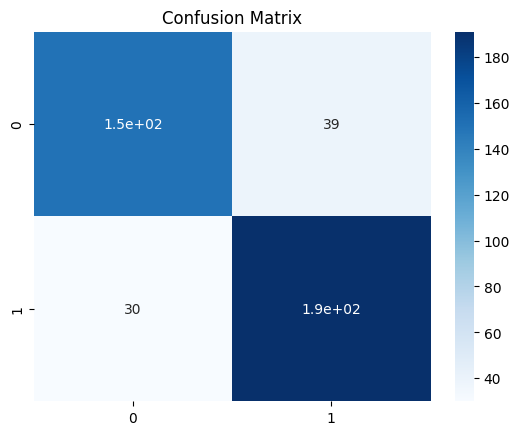

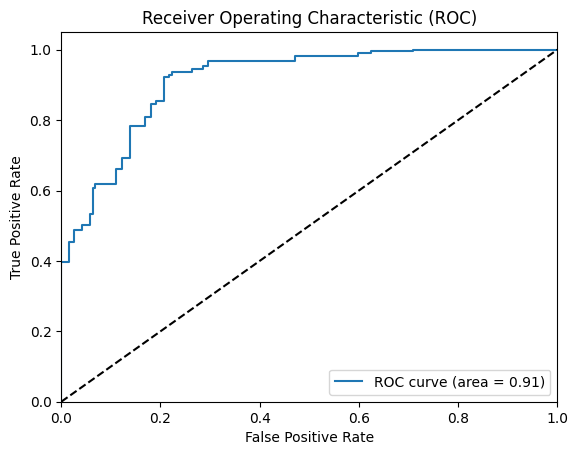

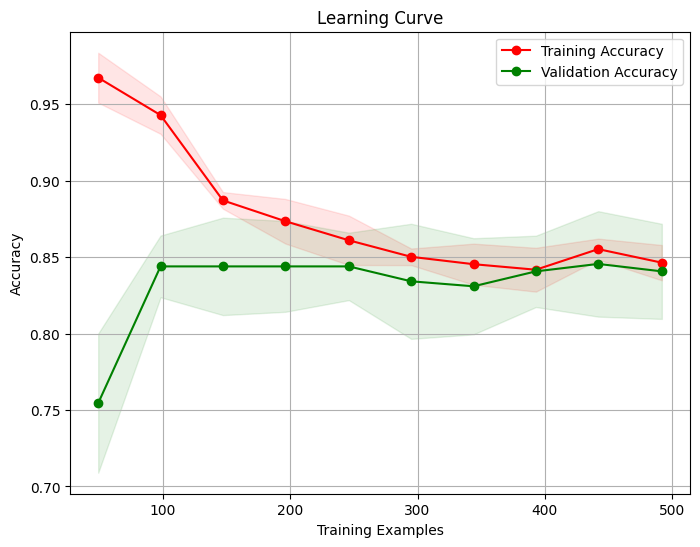

In [60]:
# Ignore the convergence warning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

# Define the hyperparameters to tune
param_grid = {'C': [0.1, 1, 10],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Create and train the logistic regression model
model = LogisticRegression(max_iter=2000)
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Calculate the accuracy and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the best hyperparameters, accuracy, and F1 score
print("Best Hyperparameters:", best_params)
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Create and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues')
plt.title("Confusion Matrix")

# Plot the ROC curve
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# Print the classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Append the best model, accuracy, and F1 score to the 'sklearn' key in the models dictionary
models["sklearn"].append((best_model, accuracy, f1))

# Plot the learning curve
plot_learning_curve(best_model, X_train, y_train)

## **SVM MODEL**

In [61]:
# Create SVM classifier
clf = SVC(kernel='linear', C=1, random_state=100)

# Train SVM classifier
clf.fit(X_train, y_train)

# Make predictions on test data
y_pred_SVM = clf.predict(X_test)

## SVM MODEL EVALUATION

Accuracy: 0.8439024390243902
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.81      0.83       189
           1       0.84      0.87      0.86       221

    accuracy                           0.84       410
   macro avg       0.84      0.84      0.84       410
weighted avg       0.84      0.84      0.84       410



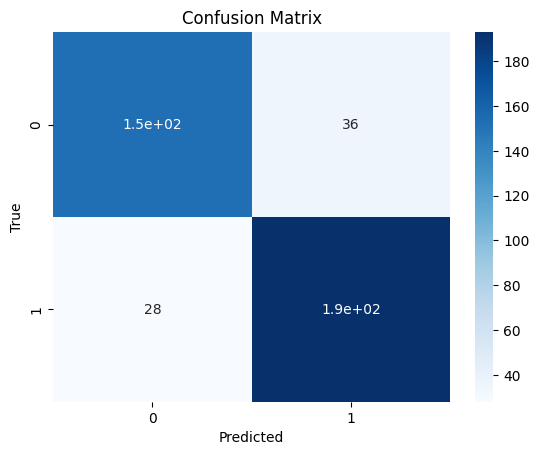

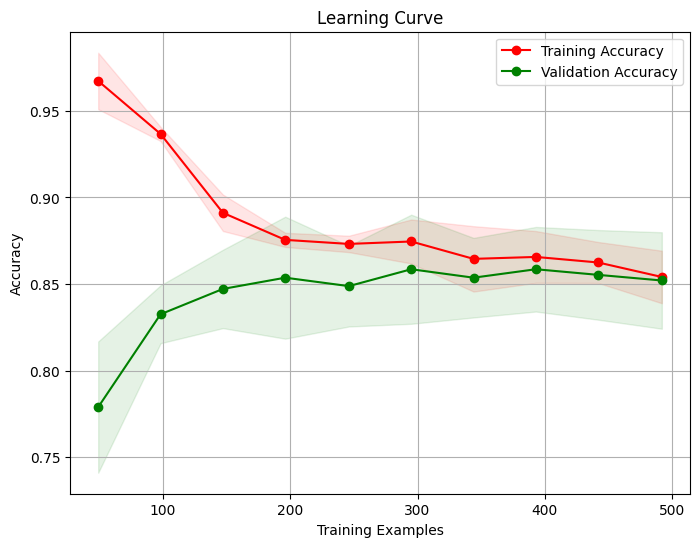

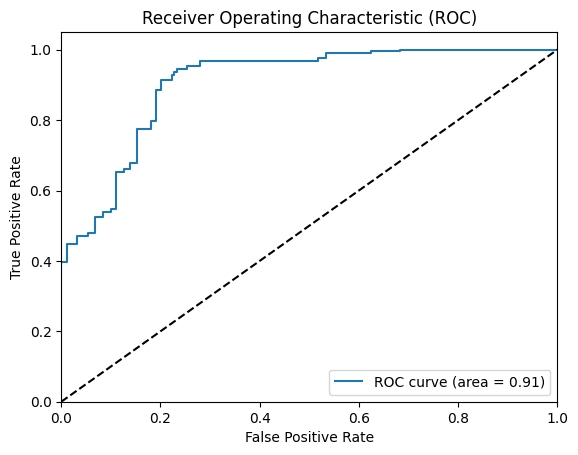

In [62]:
# Evaluate accuracy of SVM classifier
accuracy = accuracy_score(y_test, y_pred_SVM)
print('Accuracy:', accuracy)

# create a classification report
report = classification_report(y_test, y_pred_SVM)
print("Classification Report:")
print(report)

# create a heatmap of the confusion matrix
# assume y_true and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred_SVM)

# create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# set the title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.show()

# plot learning curve
plot_learning_curve(clf, X_train, y_train)

# get all possible output values
all_outputs = np.arange(0, 2)

# get F1-score for each output value
f1_scores = [f1_score(y_test, y_pred_SVM, average='macro', labels=[po]) if po in all_outputs else 0 for po in all_outputs]

# Append to models
models["sklearn"].append((clf, accuracy, f1_scores))

# Plot the ROC curve
y_pred_proba = clf.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

## Hyperparameter tuning for SVM Model

Accuracy scores for each fold: [0.92682927 0.93495935 0.91056911 0.89430894 0.95934959]
Mean accuracy: 0.9252032520325203
Standard deviation: 0.02205635766870007


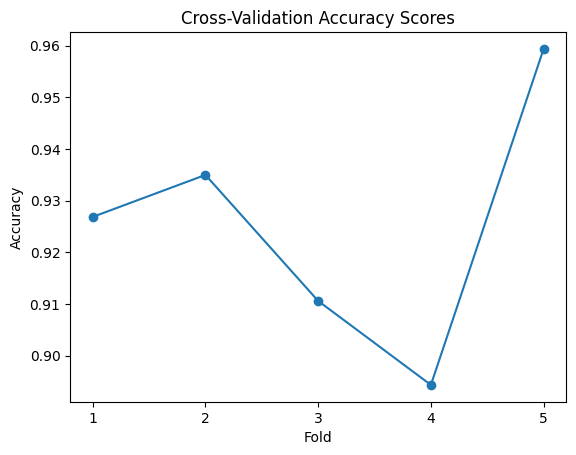

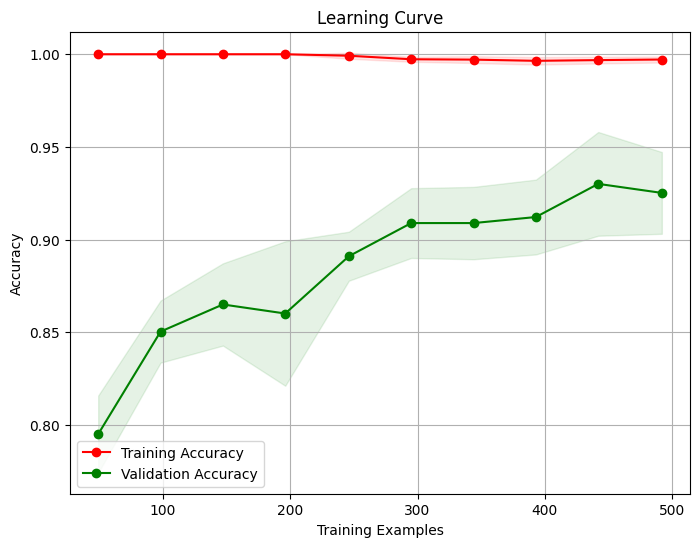

Accuracy: 0.9609756097560975
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       189
           1       0.99      0.94      0.96       221

    accuracy                           0.96       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410



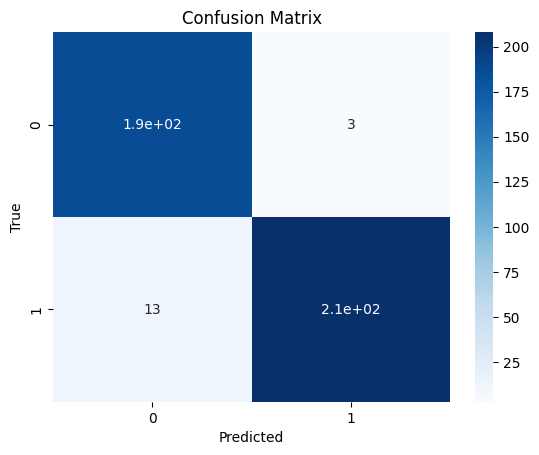

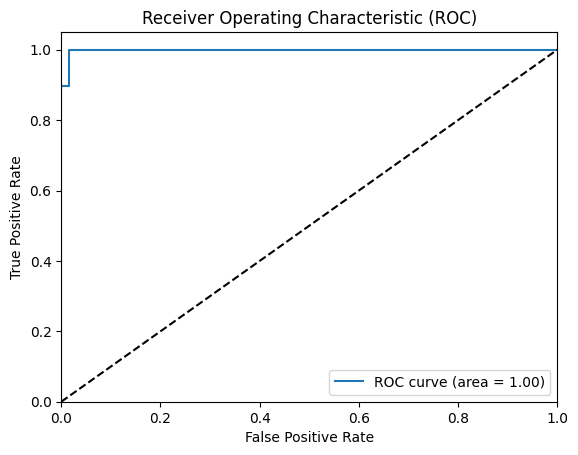

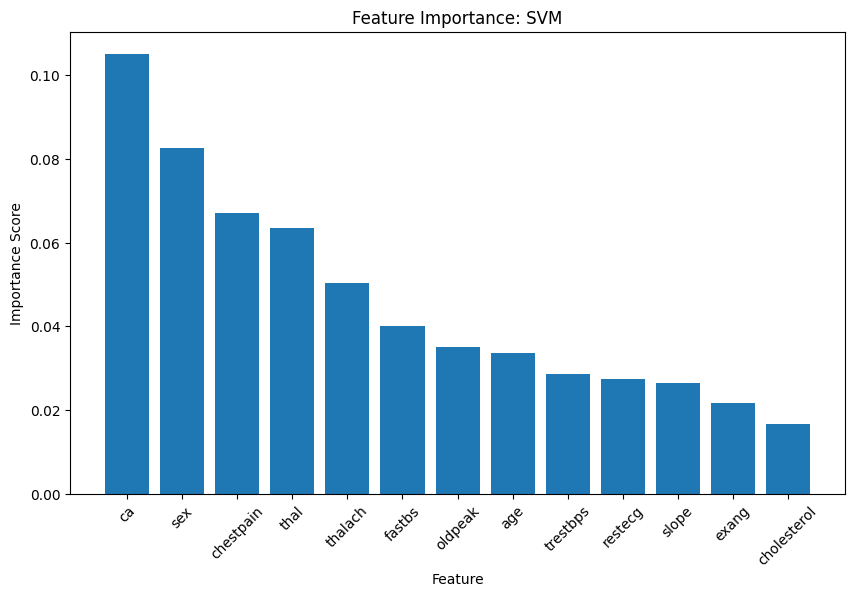

In [63]:
# Create SVM classifier
svm2 = SVC()
svm2.fit(X_train, y_train)
y_pred_svm2 = svm2.predict(X_test)

# Define a range of values for the 'C' and 'gamma' hyperparameters
params = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}

# Perform a grid search with cross-validation to find the best hyperparameter values
grid_search = GridSearchCV(svm2, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameter values
best_params = grid_search.best_params_

# Create a new SVM classifier object with the best hyperparameter values
svm2_tuned = SVC(C=best_params['C'], gamma=best_params['gamma'])

# Perform cross-validation testing
cv_scores = cross_val_score(svm2_tuned, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", cv_scores)

# Compute the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_dev = cv_scores.std()

print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev)

# Create a line graph of the cross-validation scores
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.show()

# Train the tuned SVM on the training set
svm2_tuned.fit(X_train, y_train)
y_pred_svm2_tuned = svm2_tuned.predict(X_test)

# Evaluate the tuned SVM on the test set
accuracy = accuracy_score(y_test, y_pred_svm2_tuned)

# Print the accuracy
print("Accuracy:", accuracy)

# Create a classification report
report = classification_report(y_test, y_pred_svm2_tuned)
print("Classification Report:")
print(report)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred_svm2_tuned)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the title and axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Plot the ROC curve
y_pred_proba = svm2_tuned.decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot a bar chart of F1 Score
# Get all possible output values
all_outputs = np.arange(0, 2)

# Get F1-score for each output value
f1_scores = [f1_score(y_test, y_pred_svm2_tuned, average='macro', labels=[po]) if po in all_outputs else 0 for po in all_outputs]

#append to models
models["sklearn"].append((svm2_tuned, accuracy, f1_scores))

# Perform permutation importance
perm_importance = permutation_importance(svm2_tuned, X_test, y_test, n_repeats=10, random_state=100)

# Get feature names
feature_names = ['age', 'sex', 'chestpain', 'trestbps', 'cholesterol', 'fastbs','restecg', 'thalach',
                 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Calculate feature importance scores
importance_scores = perm_importance.importances_mean

# Sort feature importance scores and feature names in descending order
sorted_indices = importance_scores.argsort()[::-1]
sorted_scores = importance_scores[sorted_indices]
sorted_feature_names = [feature_names[i] for i in sorted_indices]

# Create a bar plot of feature importance
plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_scores)
plt.title('Feature Importance: SVM')
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.xticks(rotation=45)
plt.show()

## **Random forest**

Accuracy scores for each fold: [0.89430894 0.91056911 0.91056911 0.88617886 0.91869919]
Mean accuracy: 0.9040650406504065
Standard deviation: 0.011948730452600849


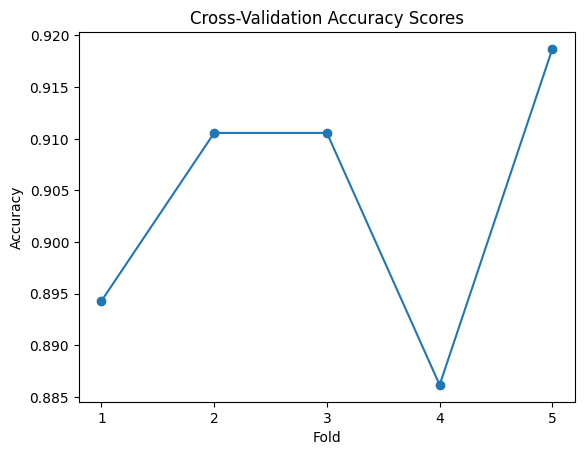

Accuracy: 0.9097560975609756
F1 Score: 0.9172259507829978


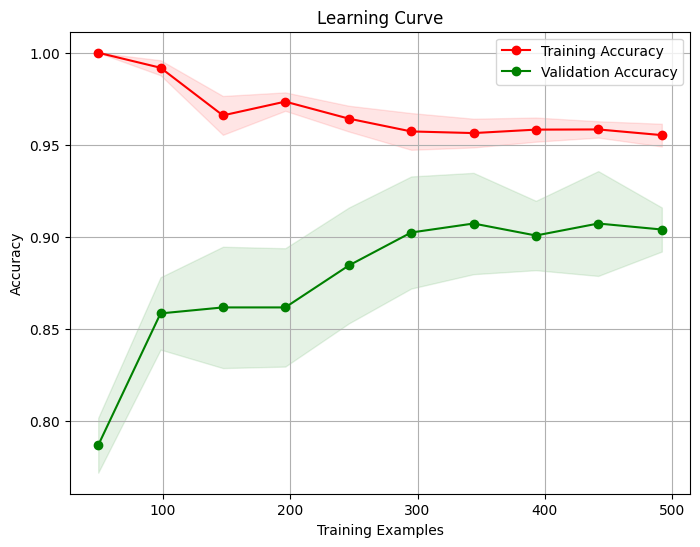

In [64]:
# Create the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, max_depth=5, min_samples_split=2, min_samples_leaf=1, max_features='sqrt', random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", cv_scores)

# Compute the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_dev = cv_scores.std()

print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev)

# Create a line graph of the cross-validation scores
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.show()

# Fit the classifier to the training data
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate the accuracy and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the accuracy and F1 score
print("Accuracy:", accuracy)
print("F1 Score:", f1)

# Append the classifier, accuracy, and F1 score to the 'sklearn' key in the models dictionary
models["sklearn"].append((clf, accuracy, f1))

# Plot the learning curve
plot_learning_curve(clf, X_train, y_train)

## Random Forest Evaluation

Accuracy: 0.9097560975609756
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       189
           1       0.91      0.93      0.92       221

    accuracy                           0.91       410
   macro avg       0.91      0.91      0.91       410
weighted avg       0.91      0.91      0.91       410



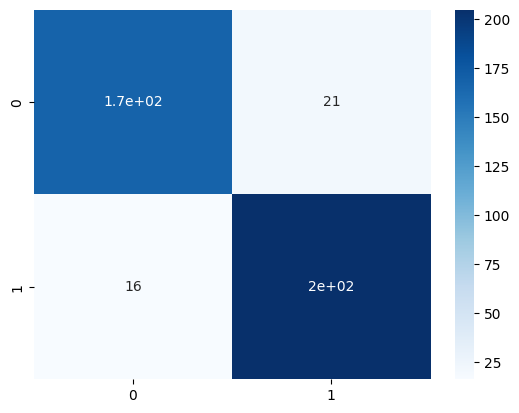

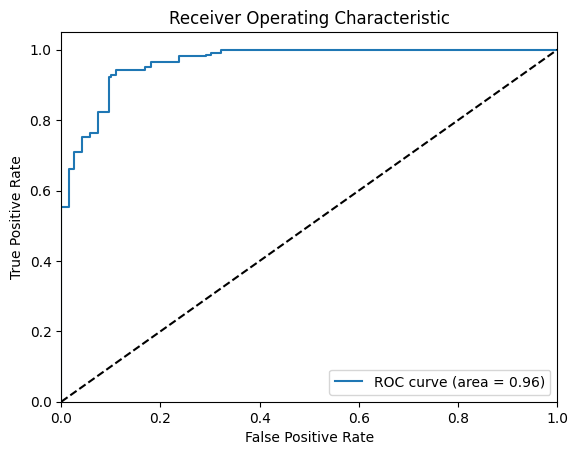

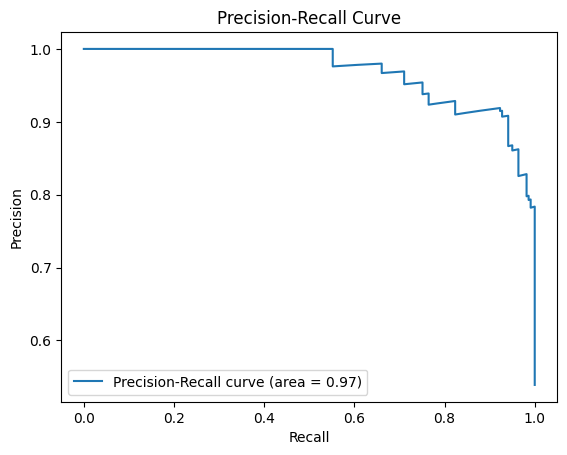

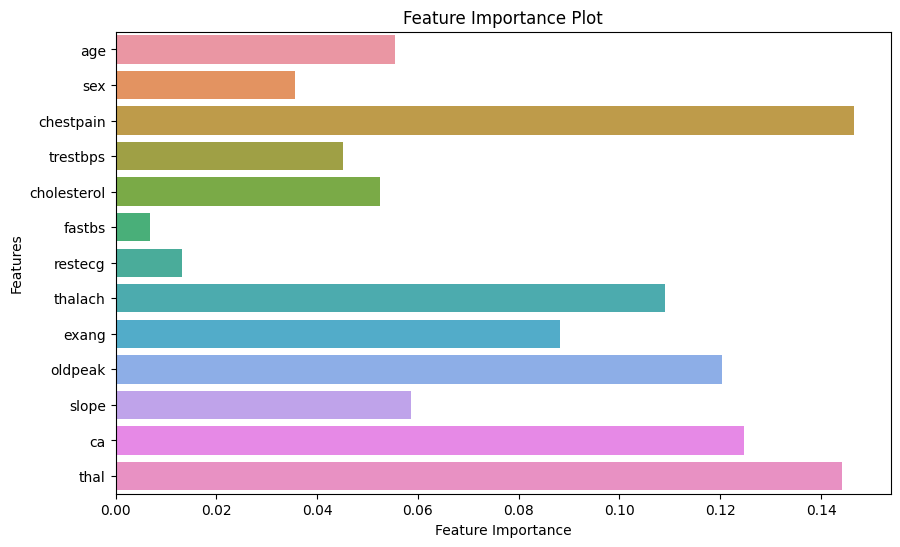

In [65]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

f1 = f1_score(y_test, y_pred)

#append to models
models["sklearn"].append((clf, accuracy, f1))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')


# Create a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Calculate the predicted probabilities for the positive class
y_pred_proba = clf.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Calculate precision-recall curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Visualize feature importances
feature_importances = clf.feature_importances_
feature_names = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_names)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()


## **XG Boost**

Accuracy scores for each fold: [0.91869919 0.93495935 0.94308943 0.92682927 0.97560976]
Mean accuracy: 0.9398373983739837
Standard deviation: 0.019647229225357013


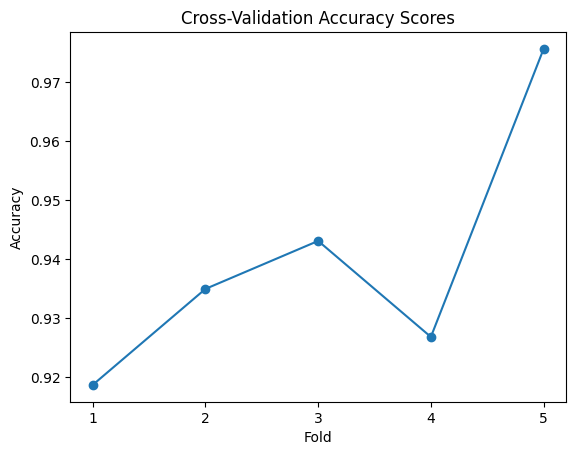

In [66]:

# Create the XGBoost classifier
clf = xgb.XGBClassifier(n_estimators=100, max_depth=5, min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.1, reg_lambda=0.1, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the accuracy scores for each fold
print("Accuracy scores for each fold:", cv_scores)

# Compute the mean accuracy and standard deviation
mean_accuracy = cv_scores.mean()
std_dev = cv_scores.std()

print("Mean accuracy:", mean_accuracy)
print("Standard deviation:", std_dev)

# Create a line graph of the cross-validation scores
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('Cross-Validation Accuracy Scores')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(range(1, 6))
plt.show()

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]


## XG Boost Evaluation

Accuracy: 0.9560975609756097
Confusion Matrix:
[[183   6]
 [ 12 209]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       189
           1       0.97      0.95      0.96       221

    accuracy                           0.96       410
   macro avg       0.96      0.96      0.96       410
weighted avg       0.96      0.96      0.96       410



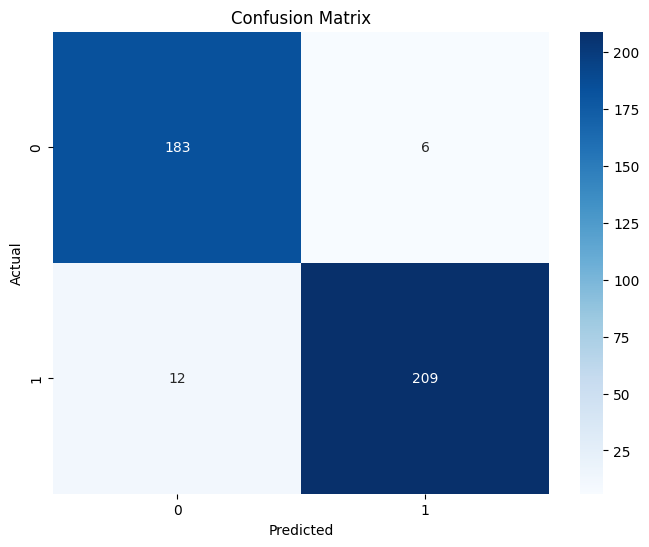

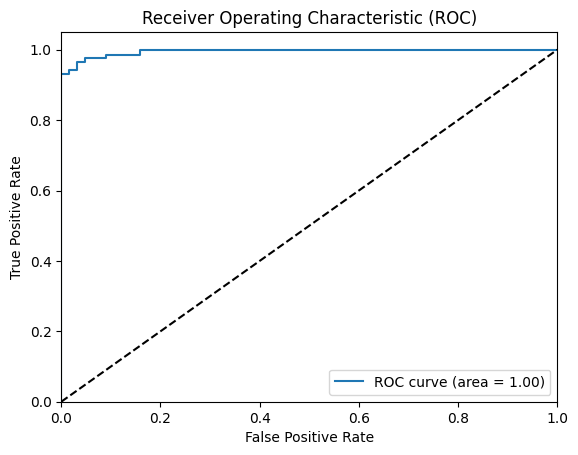

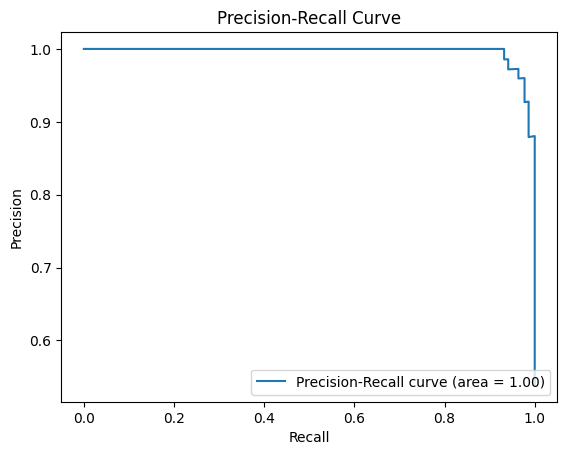

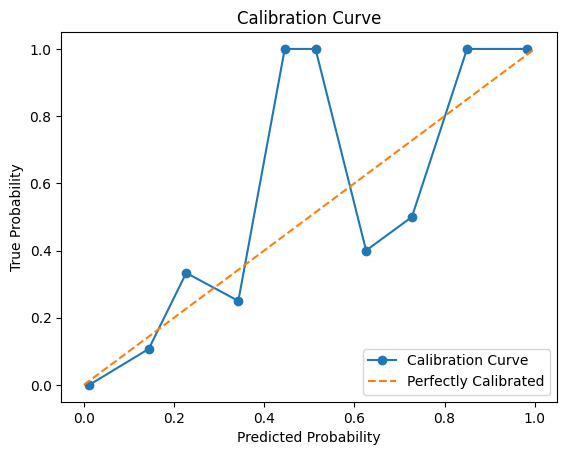

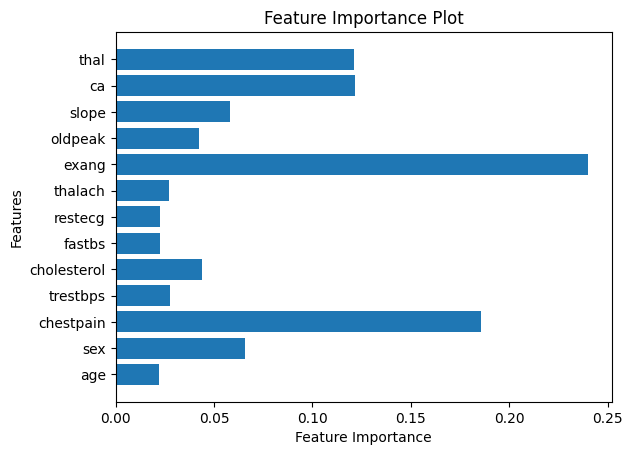

In [67]:
# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

f1 = f1_score(y_test, y_pred)

# Append the classifier, accuracy, and F1 score to the 'sklearn' key in the models dictionary
models["sklearn"].append((clf, accuracy, f1))

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Create a classification report
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot the Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)

plt.plot(recall, precision, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Calibration curve
true_prob, pred_prob = calibration_curve(y_test, y_pred_proba, n_bins=10)

plt.plot(pred_prob, true_prob, marker='o', linestyle='-', label='Calibration Curve')
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
plt.title('Calibration Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Feature Importance
feature_importance = clf.feature_importances_
feature_names = X.columns

plt.barh(feature_names, feature_importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

# **Conclusion**

In [68]:
model_list = [(model, acc, f1) for k in models.keys() for entry in models[k]
              if len(entry) == 3 for (model, acc, f1) in [entry]]
model_df = pd.DataFrame(model_list, columns=["model", "accuracy", "f1"])
model_df

model  accuracy  \
0                KNeighborsClassifier(n_neighbors=10)  0.826829   
1   KNeighborsClassifier(n_neighbors=7, weights='d...  0.963415   
2                 DecisionTreeClassifier(max_depth=5)  0.836585   
3                 DecisionTreeClassifier(max_depth=7)  0.885366   
4                   LogisticRegression(max_iter=1000)  0.843902   
5   LogisticRegression(C=10, max_iter=2000, solver...  0.831707   
6         SVC(C=1, kernel='linear', random_state=100)  0.843902   
7                                SVC(C=10, gamma=0.1)  0.960976   
8   (DecisionTreeClassifier(max_depth=5, max_featu...  0.909756   
9   (DecisionTreeClassifier(max_depth=5, max_featu...  0.909756   
10  XGBClassifier(base_score=None, booster=None, c...  0.956098   

                                          f1  
0                                   0.836782  
1                                   0.965358  
2                                   0.849438  
3                                   0.893424  
4                                   0.859649  
5                                   0.847007  
6    [0.827027027027027, 0.8577777777777778]  
7   [0.9587628865979382, 0.9629629629629629]  
8                                   0.917226  
9                                   0.917226  
10                                  0.958716